# 🌲 Hierarchical Clustering - Building Nested Cluster Structures

**Module 04: Clustering Algorithms (Unsupervised Learning)**

---

## 🎯 Learning Objectives

By the end of this notebook, you will understand:

1. **Hierarchical Clustering Paradigm** - Tree-based cluster discovery
2. **Agglomerative vs Divisive** - Bottom-up vs top-down approaches
3. **Linkage Criteria** - Single, Complete, Average, Ward linkage
4. **Dendrograms** - Visualizing hierarchical relationships
5. **Distance Metrics** - Euclidean, Manhattan, Cosine similarity
6. **Cutting the Tree** - Determining optimal number of clusters
7. **Comparison with K-Means** - When to use hierarchical methods
8. **Real-World Applications** - Taxonomy, document clustering, gene analysis

## 📚 Section 1: Theoretical Foundation

### What is Hierarchical Clustering?

**Hierarchical Clustering** creates a tree of clusters (dendrogram) that shows nested grouping relationships, unlike flat clustering (K-Means) which creates a single partition.

**Visual Concept:**
```
K-Means (Flat):              Hierarchical (Tree):

  🔴🔴  🔵🔵                      [All Data]
  🔴🔴  🔵🔵                      /        \
    🟢🟢                      [A]        [B]
    🟢🟢                     /  \       /  \
                         [🔴] [🔵]  [🟢] [🟡]
Fixed K clusters       
                         Multi-level hierarchy!
```

**Key Difference:** No need to specify K beforehand - explore all possible groupings!

---

### 🔄 Two Approaches: Agglomerative vs Divisive

#### 1. **Agglomerative (Bottom-Up) - Most Common**
```
Start: Each point is its own cluster

Step 1:  • • • • • • • •     (8 clusters)

Step 2:  •• •• •• ••         (4 clusters - merge closest pairs)

Step 3:  ••••   ••••         (2 clusters - keep merging)

Step 4:  ••••••••            (1 cluster - all merged)

Stop: Single cluster containing all data
```

**Algorithm:**
```
1. Start with N clusters (each point is a cluster)
2. While more than 1 cluster exists:
   a. Find two closest clusters
   b. Merge them into one cluster
   c. Update distance matrix
3. Result: Tree (dendrogram) of all merges
```

#### 2. **Divisive (Top-Down) - Less Common**
```
Start: All points in one cluster

Step 1:  ••••••••            (1 cluster)

Step 2:  ••••   ••••         (2 clusters - split)

Step 3:  •• •• •• ••         (4 clusters - keep splitting)

Step 4:  • • • • • • • •     (8 clusters)

Stop: Each point is its own cluster
```

**Note:** Sklearn primarily implements Agglomerative clustering.

---

### 🔗 Linkage Criteria (How to Measure Cluster Distance)

**Problem:** How do we measure distance between clusters (not points)?

#### **1. Single Linkage (Minimum)**
```
Distance = min(d(a,b)) for all a in C1, b in C2

Cluster A: •••              Cluster B: •••
           •  \___closest___/  •
           •                   •

✅ Pros: Can find elongated clusters
❌ Cons: Sensitive to noise ("chaining" effect)
```

#### **2. Complete Linkage (Maximum)**
```
Distance = max(d(a,b)) for all a in C1, b in C2

Cluster A: •••              Cluster B: •••
       furthest•____________•furthest
           •                   •

✅ Pros: Creates compact, spherical clusters
❌ Cons: Sensitive to outliers
```

#### **3. Average Linkage (UPGMA)**
```
Distance = average(d(a,b)) for all a in C1, b in C2

Cluster A: •••              Cluster B: •••
           •  \___average___/  •
           •                   •

✅ Pros: Balanced approach, less sensitive
❌ Cons: Computationally expensive
```

#### **4. Ward Linkage (Minimum Variance) - Most Popular**
```
Distance = Increase in variance when merging clusters

Minimizes: Σ(within-cluster sum of squares)

✅ Pros: Creates balanced, compact clusters
✅ Pros: Similar to K-Means objective
❌ Cons: Only works with Euclidean distance

Default choice in sklearn!
```

---

### 📊 Dendrograms: Reading the Tree

**Visual Structure:**
```
                   Height
                     ↑
        ____________|____________
       |                         |        Height = 4.0
    ___|___                   ___|___
   |       |                 |       |   Height = 2.0
  [A]     [B]               [C]     [D]  Height = 0 (leaves)

Reading the Dendrogram:
• Bottom: Individual data points (leaves)
• Height: Distance/dissimilarity when merged
• Vertical lines: Clusters being merged
• Cut horizontally: Get K clusters at that level
```

**Example:**
```
Height
  5|                    •
   |                   / \
  4|                  /   \
   |                 /     \
  3|                /       •
   |               /       / \
  2|              /       /   \
   |             •       /     \
  1|            / \     •       •
   |           /   \   / \     / \
  0|________[A]_[B]_[C]_[D]_[E]_[F]___

Cut at height=3: Get 2 clusters {AB, CDEF}
Cut at height=2: Get 3 clusters {AB, CD, EF}
Cut at height=1: Get 5 clusters {A, B, CD, E, F}
```

---

### 🎯 Mathematical Formulation

**Distance Between Points:**
```
Euclidean: d(x, y) = √(Σ(xᵢ - yᵢ)²)
Manhattan: d(x, y) = Σ|xᵢ - yᵢ|
Cosine:    d(x, y) = 1 - (x·y)/(||x|| ||y||)
```

**Linkage Formulas:**

**Single Linkage:**
```
d(C₁, C₂) = min{d(x, y) : x ∈ C₁, y ∈ C₂}
```

**Complete Linkage:**
```
d(C₁, C₂) = max{d(x, y) : x ∈ C₁, y ∈ C₂}
```

**Average Linkage:**
```
d(C₁, C₂) = (1/(|C₁|×|C₂|)) Σ Σ d(x, y)
             x∈C₁ y∈C₂
```

**Ward Linkage:**
```
d(C₁, C₂) = √( (2×|C₁|×|C₂|)/(|C₁|+|C₂|) ) × ||μ₁ - μ₂||²

Where μ₁, μ₂ are cluster centroids
```

---

### 📈 Time Complexity Analysis

| **Method** | **Time Complexity** | **Space Complexity** |
|-----------|---------------------|---------------------|
| **K-Means** | O(n×k×i) | O(n×k) |
| **Agglomerative (naive)** | O(n³) | O(n²) |
| **Agglomerative (optimized)** | O(n²log n) | O(n²) |
| **Single/Complete Linkage** | O(n²) | O(n²) |
| **Ward Linkage** | O(n²log n) | O(n²) |

**Implication:** Hierarchical clustering is slower than K-Means for large datasets!

---

### 🌟 Advantages vs Disadvantages

| **Advantages ✅** | **Disadvantages ❌** |
|------------------|---------------------|
| No need to specify K upfront | O(n²) time complexity (slow) |
| Dendrogram provides full hierarchy | O(n²) space complexity (memory) |
| Works with any distance metric | Not suitable for large datasets (n>5000) |
| Deterministic results | Cannot undo merges (greedy) |
| Handles irregular cluster shapes | Sensitive to noise and outliers |
| Natural for nested data | Difficult to interpret with many points |
| Can explore multiple K values | No global objective function |
| Good for small-medium datasets | Computationally expensive |

---

### 🎯 When to Use Hierarchical Clustering?

| **Use Hierarchical When** | **Avoid When** |
|---------------------------|---------------|
| Need to explore cluster hierarchy | Dataset has >10,000 samples |
| Don't know K beforehand | Need real-time clustering |
| Small to medium datasets | Memory is limited |
| Want deterministic results | Speed is critical |
| Dendrograms are useful | K is known and fixed |
| Irregular cluster shapes | Want probabilistic assignments |
| Taxonomies or genealogies | Streaming data |
| Gene expression analysis | Very high dimensions |

**Real-World Applications:**
- **Biology**: Phylogenetic trees, gene clustering
- **Marketing**: Customer hierarchy, product categorization
- **Document Analysis**: Topic hierarchy, similar documents
- **Social Networks**: Community detection
- **Image Segmentation**: Pixel grouping
- **Anomaly Detection**: Outliers appear as single branches
- **Taxonomy Creation**: Organize items hierarchically

---

### 🆚 Hierarchical vs K-Means Comparison

| **Aspect** | **Hierarchical** | **K-Means** |
|------------|------------------|-------------|
| **K Selection** | Not needed (cut tree anywhere) | Must specify K |
| **Output** | Tree (dendrogram) | Flat partition |
| **Determinism** | Yes (same result always) | No (random init) |
| **Speed** | O(n²log n) - Slow | O(nki) - Fast |
| **Memory** | O(n²) - High | O(n) - Low |
| **Scalability** | Poor (n<5000) | Excellent (millions) |
| **Cluster Shape** | Flexible | Spherical only |
| **Outlier Handling** | Visible in dendrogram | Pulls centroids |
| **Updates** | Must recompute all | Can update online |
| **Interpretability** | High (tree structure) | Medium (centroids) |

---

### 🔬 Distance Metrics Comparison

| **Metric** | **Formula** | **Best For** | **Properties** |
|-----------|-------------|-------------|---------------|
| **Euclidean** | √Σ(xᵢ-yᵢ)² | Continuous features | Sensitive to scale |
| **Manhattan** | Σ\|xᵢ-yᵢ\| | Grid-like patterns | Less sensitive to outliers |
| **Cosine** | 1-(x·y)/(‖x‖‖y‖) | Text, high-dim sparse | Angle-based, scale-invariant |
| **Correlation** | 1-corr(x,y) | Time series | Captures pattern similarity |
| **Hamming** | Σ(xᵢ≠yᵢ) | Categorical data | Count of differences |

## 🔧 Section 2: Setup & Dataset Loading

In [4]:
# Import Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, load_iris, load_wine, make_moons
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import (
    silhouette_score, silhouette_samples, davies_bouldin_score,
    calinski_harabasz_score, adjusted_rand_score, normalized_mutual_info_score
)
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully!")
print(f"📦 Scikit-learn version: {__import__('sklearn').__version__}")
print(f"📦 Scipy version: {__import__('scipy').__version__}")

✅ Libraries imported successfully!
📦 Scikit-learn version: 1.7.2
📦 Scipy version: 1.13.1


### 2.1 Synthetic Dataset: Clear Hierarchical Structure

In [7]:
# Create synthetic data with hierarchical structure
np.random.seed(42)

# Create 3 main clusters, each with 2 sub-clusters
X_hier, y_hier = make_blobs(
    n_samples=150,
    n_features=2,
    centers=6,
    cluster_std=0.5,
    random_state=42
)

print("📊 Synthetic Hierarchical Dataset")
print(f"Shape: {X_hier.shape}")
print(f"Features: 2 (for easy visualization)")
print(f"True sub-clusters: 6")
print(f"Samples: {X_hier.shape[0]}")

📊 Synthetic Hierarchical Dataset
Shape: (150, 2)
Features: 2 (for easy visualization)
True sub-clusters: 6
Samples: 150


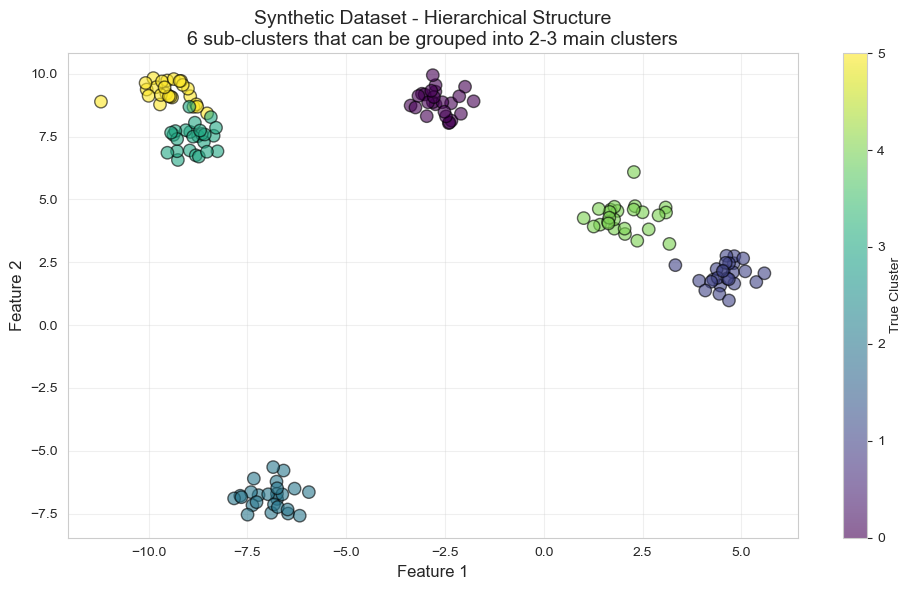

In [9]:
# Visualize synthetic data
plt.figure(figsize=(10, 6))
plt.scatter(X_hier[:, 0], X_hier[:, 1], c=y_hier, cmap='viridis',
            alpha=0.6, s=80, edgecolors='black')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Synthetic Dataset - Hierarchical Structure\n6 sub-clusters that can be grouped into 2-3 main clusters', 
          fontsize=14)
plt.colorbar(label='True Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 2.2 Real Dataset: Iris Flowers

In [12]:
# Load Iris dataset
iris = load_iris(as_frame=True)
df_iris = iris.frame

print("\n📊 Iris Dataset (Real-World Data)")
print(f"Shape: {df_iris.shape}")
print(f"Features: {list(iris.feature_names)}")
print(f"True species: {iris.target_names.tolist()}")
print(f"\nSpecies Distribution:")
print(df_iris['target'].value_counts().sort_index())
print("\n" + "="*70)
print(df_iris.head())


📊 Iris Dataset (Real-World Data)
Shape: (150, 5)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
True species: ['setosa', 'versicolor', 'virginica']

Species Distribution:
target
0    50
1    50
2    50
Name: count, dtype: int64

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [14]:
# Prepare Iris data
X_iris = df_iris.drop('target', axis=1).values
y_true_iris = df_iris['target'].values

# Scale features (important for distance-based methods!)
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

print(f"\n✂️ Iris Data Prepared:")
print(f"Features shape: {X_iris_scaled.shape}")
print(f"Features scaled: ✓ (mean=0, std=1)")
print(f"True labels available: {len(np.unique(y_true_iris))} species")


✂️ Iris Data Prepared:
Features shape: (150, 4)
Features scaled: ✓ (mean=0, std=1)
True labels available: 3 species


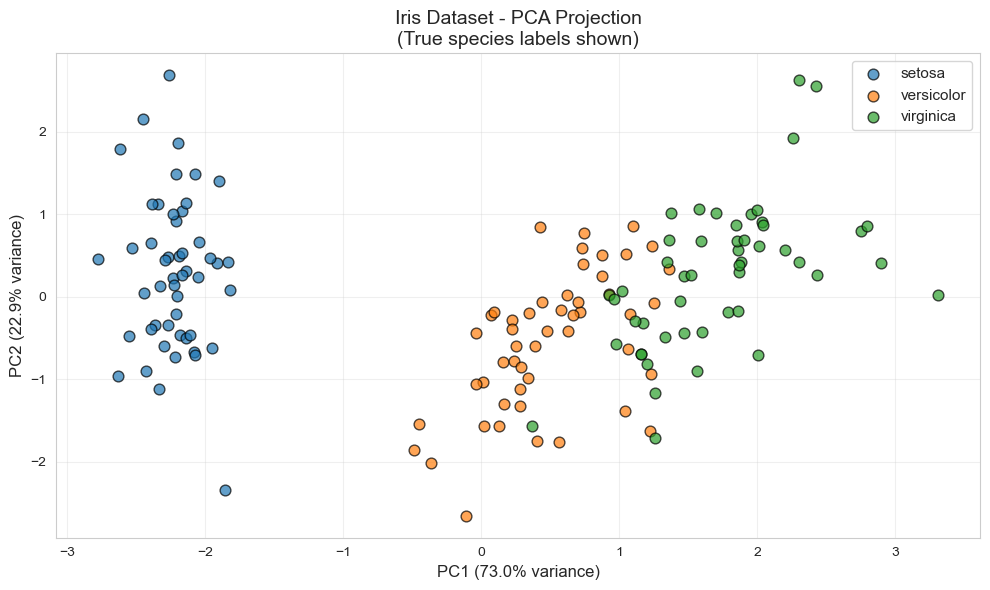

In [16]:
# Visualize Iris in 2D using PCA
pca = PCA(n_components=2)
X_iris_pca = pca.fit_transform(X_iris_scaled)

plt.figure(figsize=(10, 6))
for i, species in enumerate(iris.target_names):
    mask = y_true_iris == i
    plt.scatter(X_iris_pca[mask, 0], X_iris_pca[mask, 1],
                label=species, alpha=0.7, s=60, edgecolors='black')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)', fontsize=12)
plt.title('Iris Dataset - PCA Projection\n(True species labels shown)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 2.3 Wine Dataset (Multi-Class)

In [20]:
# Load Wine dataset
wine = load_wine(as_frame=True)
df_wine = wine.frame

print("\n📊 Wine Dataset (Multi-Class Classification)")
print(f"Shape: {df_wine.shape}")
print(f"Features: {len(wine.feature_names)}")
print(f"Classes: {wine.target_names.tolist()}")
print(f"\nClass Distribution:")
print(df_wine['target'].value_counts().sort_index())

# Prepare Wine data
X_wine = df_wine.drop('target', axis=1).values
y_true_wine = df_wine['target'].values

# Scale
X_wine_scaled = StandardScaler().fit_transform(X_wine)

print(f"\nWine data prepared: {X_wine_scaled.shape}")


📊 Wine Dataset (Multi-Class Classification)
Shape: (178, 14)
Features: 13
Classes: ['class_0', 'class_1', 'class_2']

Class Distribution:
target
0    59
1    71
2    48
Name: count, dtype: int64

Wine data prepared: (178, 13)


## 🧪 Section 3: Building Hierarchical Clustering Models

### 3.1 Basic Agglomerative Clustering (Ward Linkage)

In [24]:
# Train hierarchical clustering with Ward linkage
hier_ward = AgglomerativeClustering(
    n_clusters=3,
    linkage='ward'
)
labels_ward = hier_ward.fit_predict(X_iris_scaled)

print("📊 Agglomerative Clustering with Ward Linkage")
print("="*70)
print(f"Number of clusters: {hier_ward.n_clusters}")
print(f"Linkage: {hier_ward.linkage}")
print(f"\nCluster sizes:")
unique, counts = np.unique(labels_ward, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"  Cluster {cluster}: {count} samples")

📊 Agglomerative Clustering with Ward Linkage
Number of clusters: 3
Linkage: ward

Cluster sizes:
  Cluster 0: 71 samples
  Cluster 1: 49 samples
  Cluster 2: 30 samples


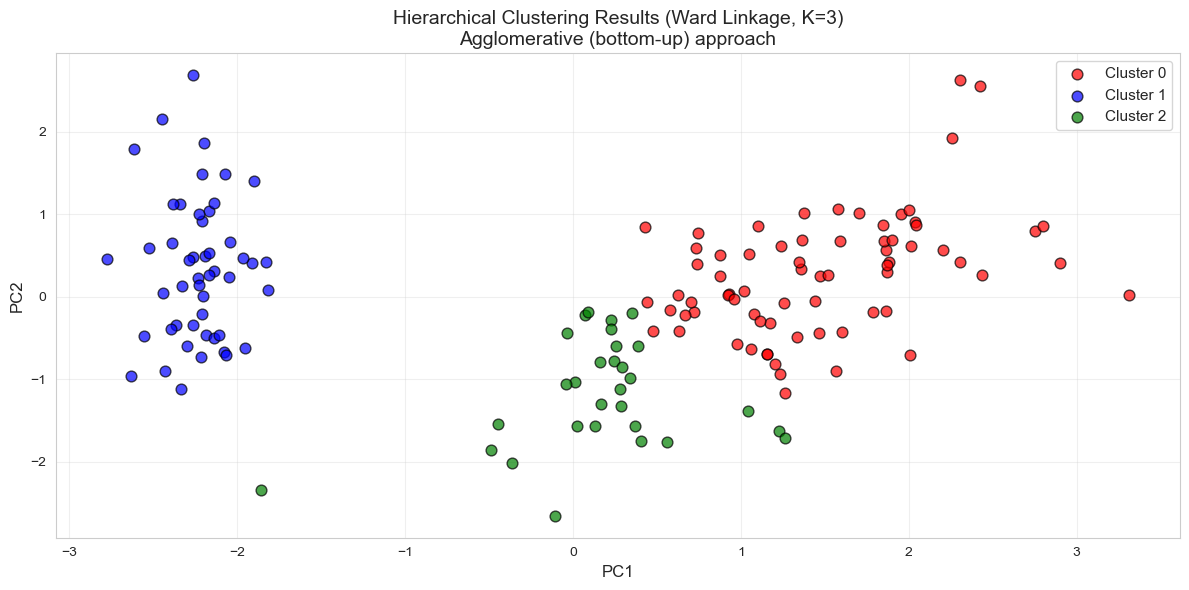

In [26]:
# Visualize clusters (PCA projection)
plt.figure(figsize=(12, 6))

colors = ['red', 'blue', 'green']
for i in range(3):
    mask = labels_ward == i
    plt.scatter(X_iris_pca[mask, 0], X_iris_pca[mask, 1],
                label=f'Cluster {i}', alpha=0.7, s=60,
                color=colors[i], edgecolors='black')

plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.title('Hierarchical Clustering Results (Ward Linkage, K=3)\nAgglomerative (bottom-up) approach', 
          fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [28]:
# Compare with true labels
comparison_df = pd.DataFrame({
    'True Species': y_true_iris,
    'Hierarchical Cluster': labels_ward
})

print("\n📊 Cluster vs True Species Confusion Matrix:")
print("="*70)
confusion = pd.crosstab(comparison_df['True Species'], comparison_df['Hierarchical Cluster'],
                        rownames=['True Species'], colnames=['Cluster'])
print(confusion)

# External validation metrics
ari_ward = adjusted_rand_score(y_true_iris, labels_ward)
nmi_ward = normalized_mutual_info_score(y_true_iris, labels_ward)
silhouette_ward = silhouette_score(X_iris_scaled, labels_ward)

print(f"\n📈 Validation Metrics:")
print(f"Adjusted Rand Index (ARI): {ari_ward:.4f}")
print(f"Normalized Mutual Info (NMI): {nmi_ward:.4f}")
print(f"Silhouette Score: {silhouette_ward:.4f}")


📊 Cluster vs True Species Confusion Matrix:
Cluster        0   1   2
True Species            
0              0  49   1
1             23   0  27
2             48   0   2

📈 Validation Metrics:
Adjusted Rand Index (ARI): 0.6153
Normalized Mutual Info (NMI): 0.6755
Silhouette Score: 0.4467


### 3.2 The Dendrogram - Visualizing the Hierarchy

In [31]:
# Create linkage matrix for dendrogram
linkage_matrix = linkage(X_iris_scaled, method='ward')

print("\n🌲 Creating Dendrogram...")
print("="*70)
print("Linkage matrix shape:", linkage_matrix.shape)
print("Each row represents a merge: [cluster1, cluster2, distance, sample_count]")
print("\nFirst 5 merges:")
print(linkage_matrix[:5])


🌲 Creating Dendrogram...
Linkage matrix shape: (149, 4)
Each row represents a merge: [cluster1, cluster2, distance, sample_count]

First 5 merges:
[[1.01000000e+02 1.42000000e+02 0.00000000e+00 2.00000000e+00]
 [7.00000000e+00 3.90000000e+01 1.21167870e-01 2.00000000e+00]
 [1.00000000e+01 4.80000000e+01 1.21167870e-01 2.00000000e+00]
 [9.00000000e+00 3.40000000e+01 1.31632184e-01 2.00000000e+00]
 [0.00000000e+00 1.70000000e+01 1.31632184e-01 2.00000000e+00]]


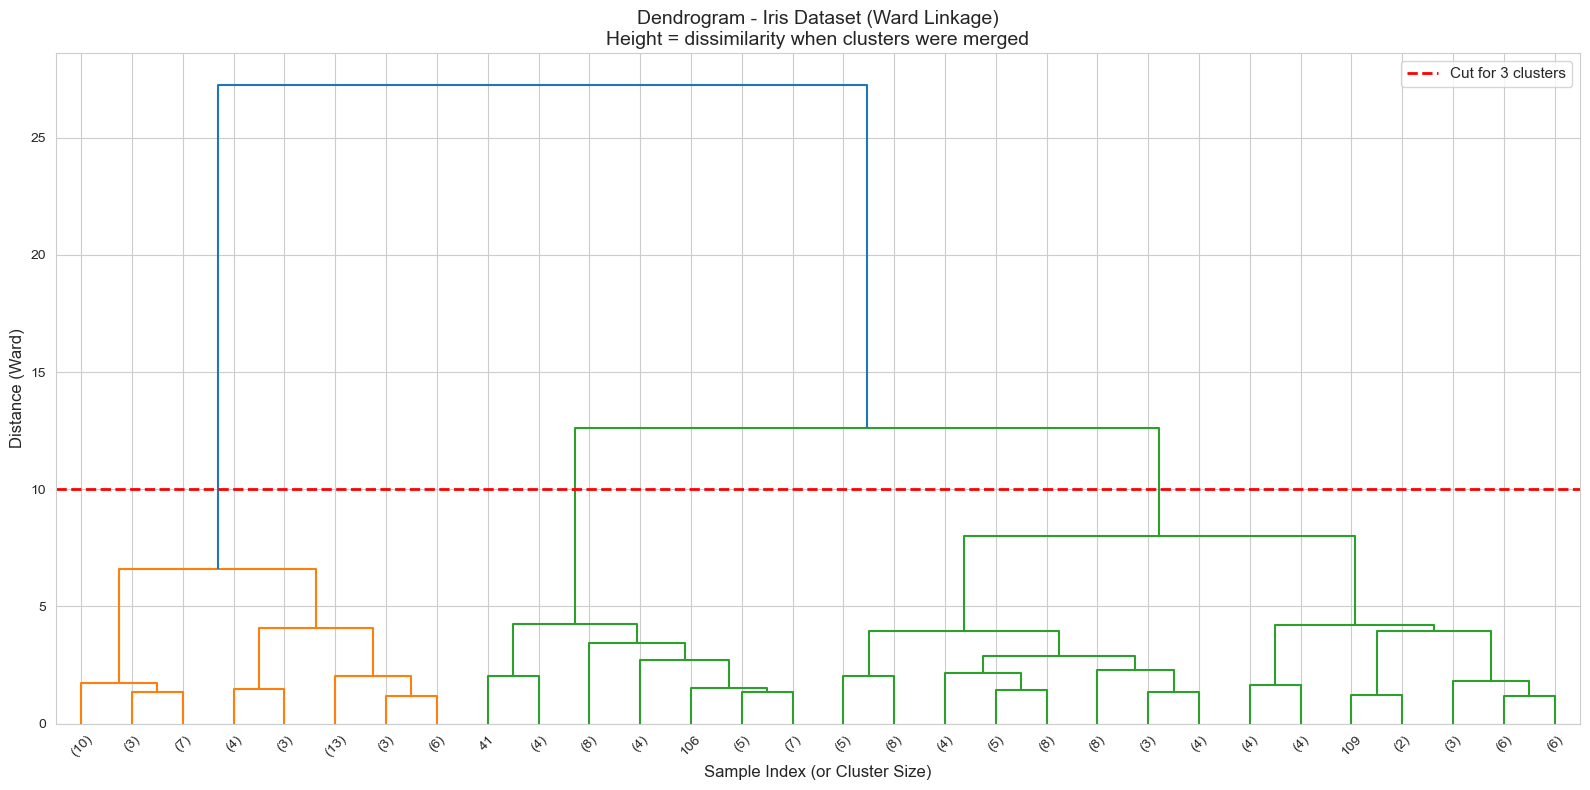


📖 How to Read the Dendrogram:
  • Vertical axis: Distance/dissimilarity at merge
  • Horizontal lines: Clusters being merged
  • Vertical lines: Height of merge
  • Bottom: Individual samples or small clusters
  • Cut horizontally to get K clusters
  • Higher cuts = fewer clusters


In [33]:
# Plot dendrogram
plt.figure(figsize=(16, 8))
dendrogram_plot = dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # Show only last p merged clusters
    p=30,  # Show last 30 merges
    leaf_font_size=10,
    show_leaf_counts=True
)

plt.xlabel('Sample Index (or Cluster Size)', fontsize=12)
plt.ylabel('Distance (Ward)', fontsize=12)
plt.title('Dendrogram - Iris Dataset (Ward Linkage)\nHeight = dissimilarity when clusters were merged', 
          fontsize=14)
plt.axhline(y=10, color='r', linestyle='--', linewidth=2, label='Cut for 3 clusters')
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print("\n📖 How to Read the Dendrogram:")
print("  • Vertical axis: Distance/dissimilarity at merge")
print("  • Horizontal lines: Clusters being merged")
print("  • Vertical lines: Height of merge")
print("  • Bottom: Individual samples or small clusters")
print("  • Cut horizontally to get K clusters")
print("  • Higher cuts = fewer clusters")

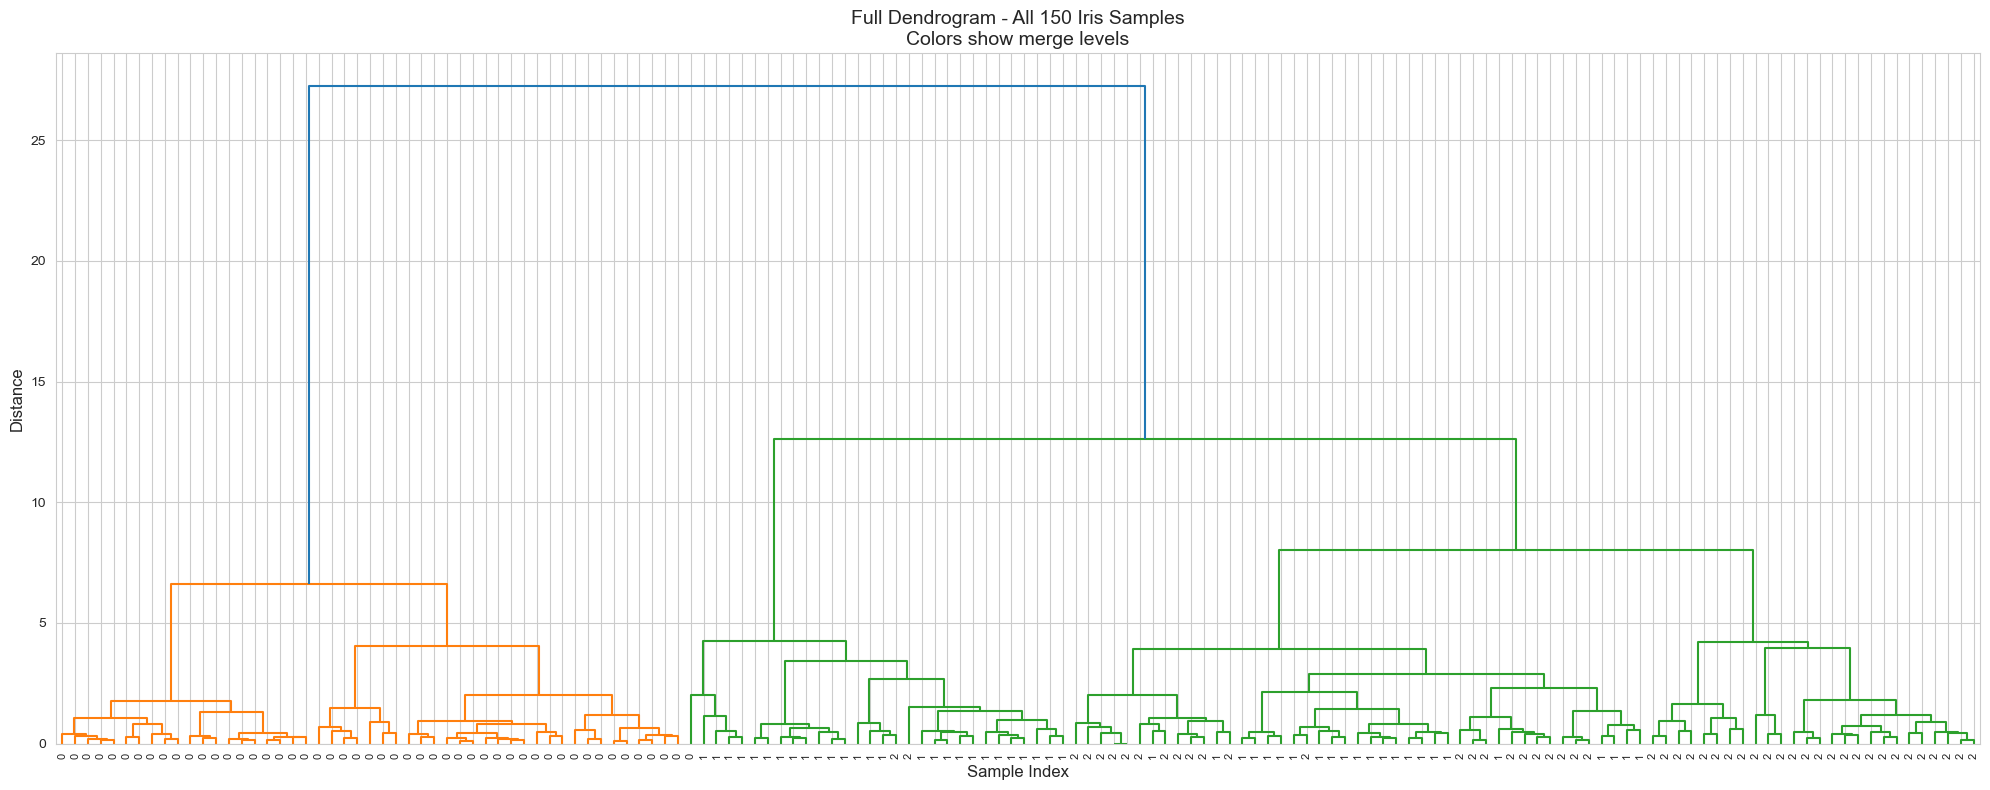


💡 In the full dendrogram, you can see:
  • Early merges (bottom): Similar samples within species
  • Late merges (top): Different species coming together
  • Three main branches: Likely corresponding to three species


In [35]:
# Full dendrogram (all samples)
plt.figure(figsize=(20, 8))
dendrogram_full = dendrogram(
    linkage_matrix,
    labels=y_true_iris,  # Show true labels
    leaf_font_size=8
)

plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.title('Full Dendrogram - All 150 Iris Samples\nColors show merge levels', fontsize=14)
plt.tight_layout()
plt.show()

print("\n💡 In the full dendrogram, you can see:")
print("  • Early merges (bottom): Similar samples within species")
print("  • Late merges (top): Different species coming together")
print("  • Three main branches: Likely corresponding to three species")

### 3.3 Comparing Different Linkage Methods

In [38]:
# Test all linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']
linkage_results = []

print("\n🔍 Comparing Linkage Methods...")
print("="*70)

for method in linkage_methods:
    if method == 'ward':
        # Ward only works with euclidean distance
        hier_temp = AgglomerativeClustering(n_clusters=3, linkage=method)
    else:
        hier_temp = AgglomerativeClustering(n_clusters=3, linkage=method)
    
    labels_temp = hier_temp.fit_predict(X_iris_scaled)
    
    # Calculate metrics
    ari = adjusted_rand_score(y_true_iris, labels_temp)
    silhouette = silhouette_score(X_iris_scaled, labels_temp)
    davies_bouldin = davies_bouldin_score(X_iris_scaled, labels_temp)
    
    linkage_results.append({
        'Linkage': method,
        'ARI': ari,
        'Silhouette': silhouette,
        'Davies-Bouldin': davies_bouldin
    })

linkage_df = pd.DataFrame(linkage_results)
print("\n📊 Linkage Method Comparison:")
print(linkage_df.to_string(index=False))


🔍 Comparing Linkage Methods...

📊 Linkage Method Comparison:
 Linkage      ARI  Silhouette  Davies-Bouldin
    ward 0.615323    0.446689        0.803467
complete 0.572631    0.449618        0.758358
 average 0.562136    0.480267        0.575269
  single 0.558371    0.504646        0.492925


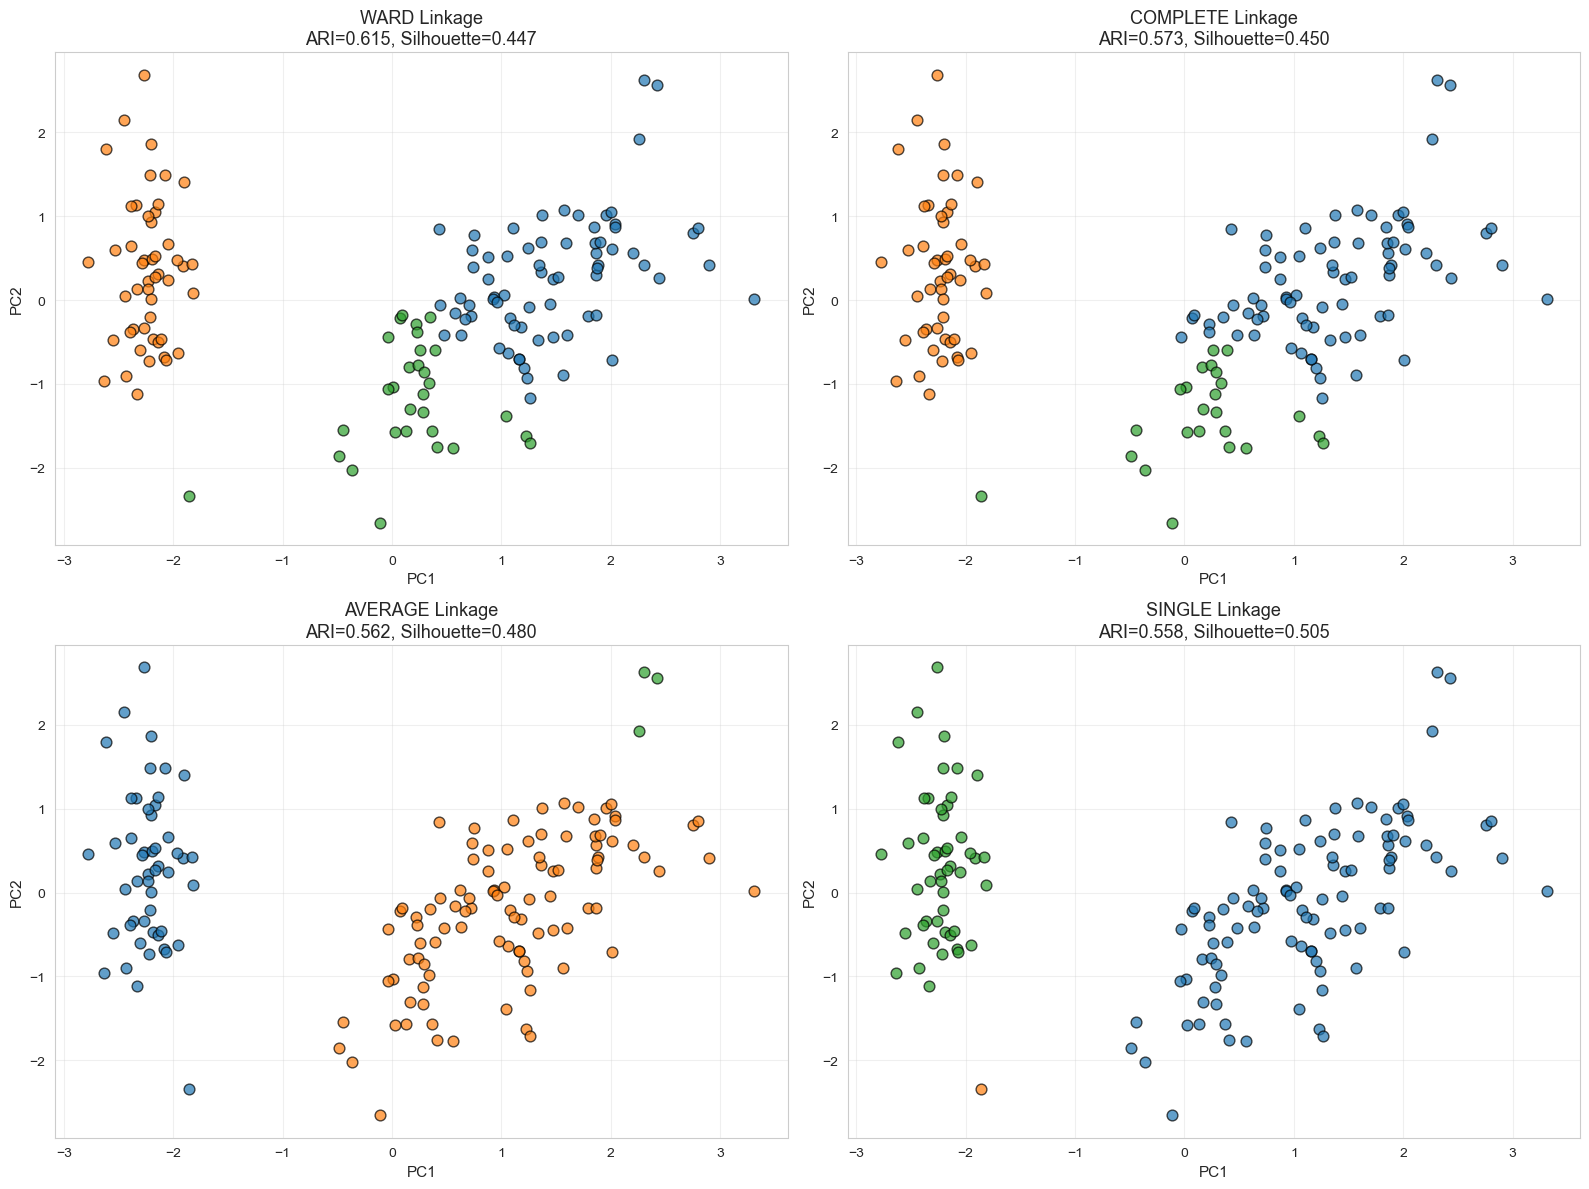

In [40]:
# Visualize linkage comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for idx, method in enumerate(linkage_methods):
    ax = axes[idx // 2, idx % 2]
    
    # Fit model
    hier_temp = AgglomerativeClustering(n_clusters=3, linkage=method)
    labels_temp = hier_temp.fit_predict(X_iris_scaled)
    
    # Plot
    for i in range(3):
        mask = labels_temp == i
        ax.scatter(X_iris_pca[mask, 0], X_iris_pca[mask, 1],
                   alpha=0.7, s=60, edgecolors='black')
    
    ari = linkage_df[linkage_df['Linkage'] == method]['ARI'].values[0]
    sil = linkage_df[linkage_df['Linkage'] == method]['Silhouette'].values[0]
    
    ax.set_xlabel('PC1', fontsize=11)
    ax.set_ylabel('PC2', fontsize=11)
    ax.set_title(f'{method.upper()} Linkage\nARI={ari:.3f}, Silhouette={sil:.3f}', 
                fontsize=13)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3.4 Dendrograms for Different Linkage Methods

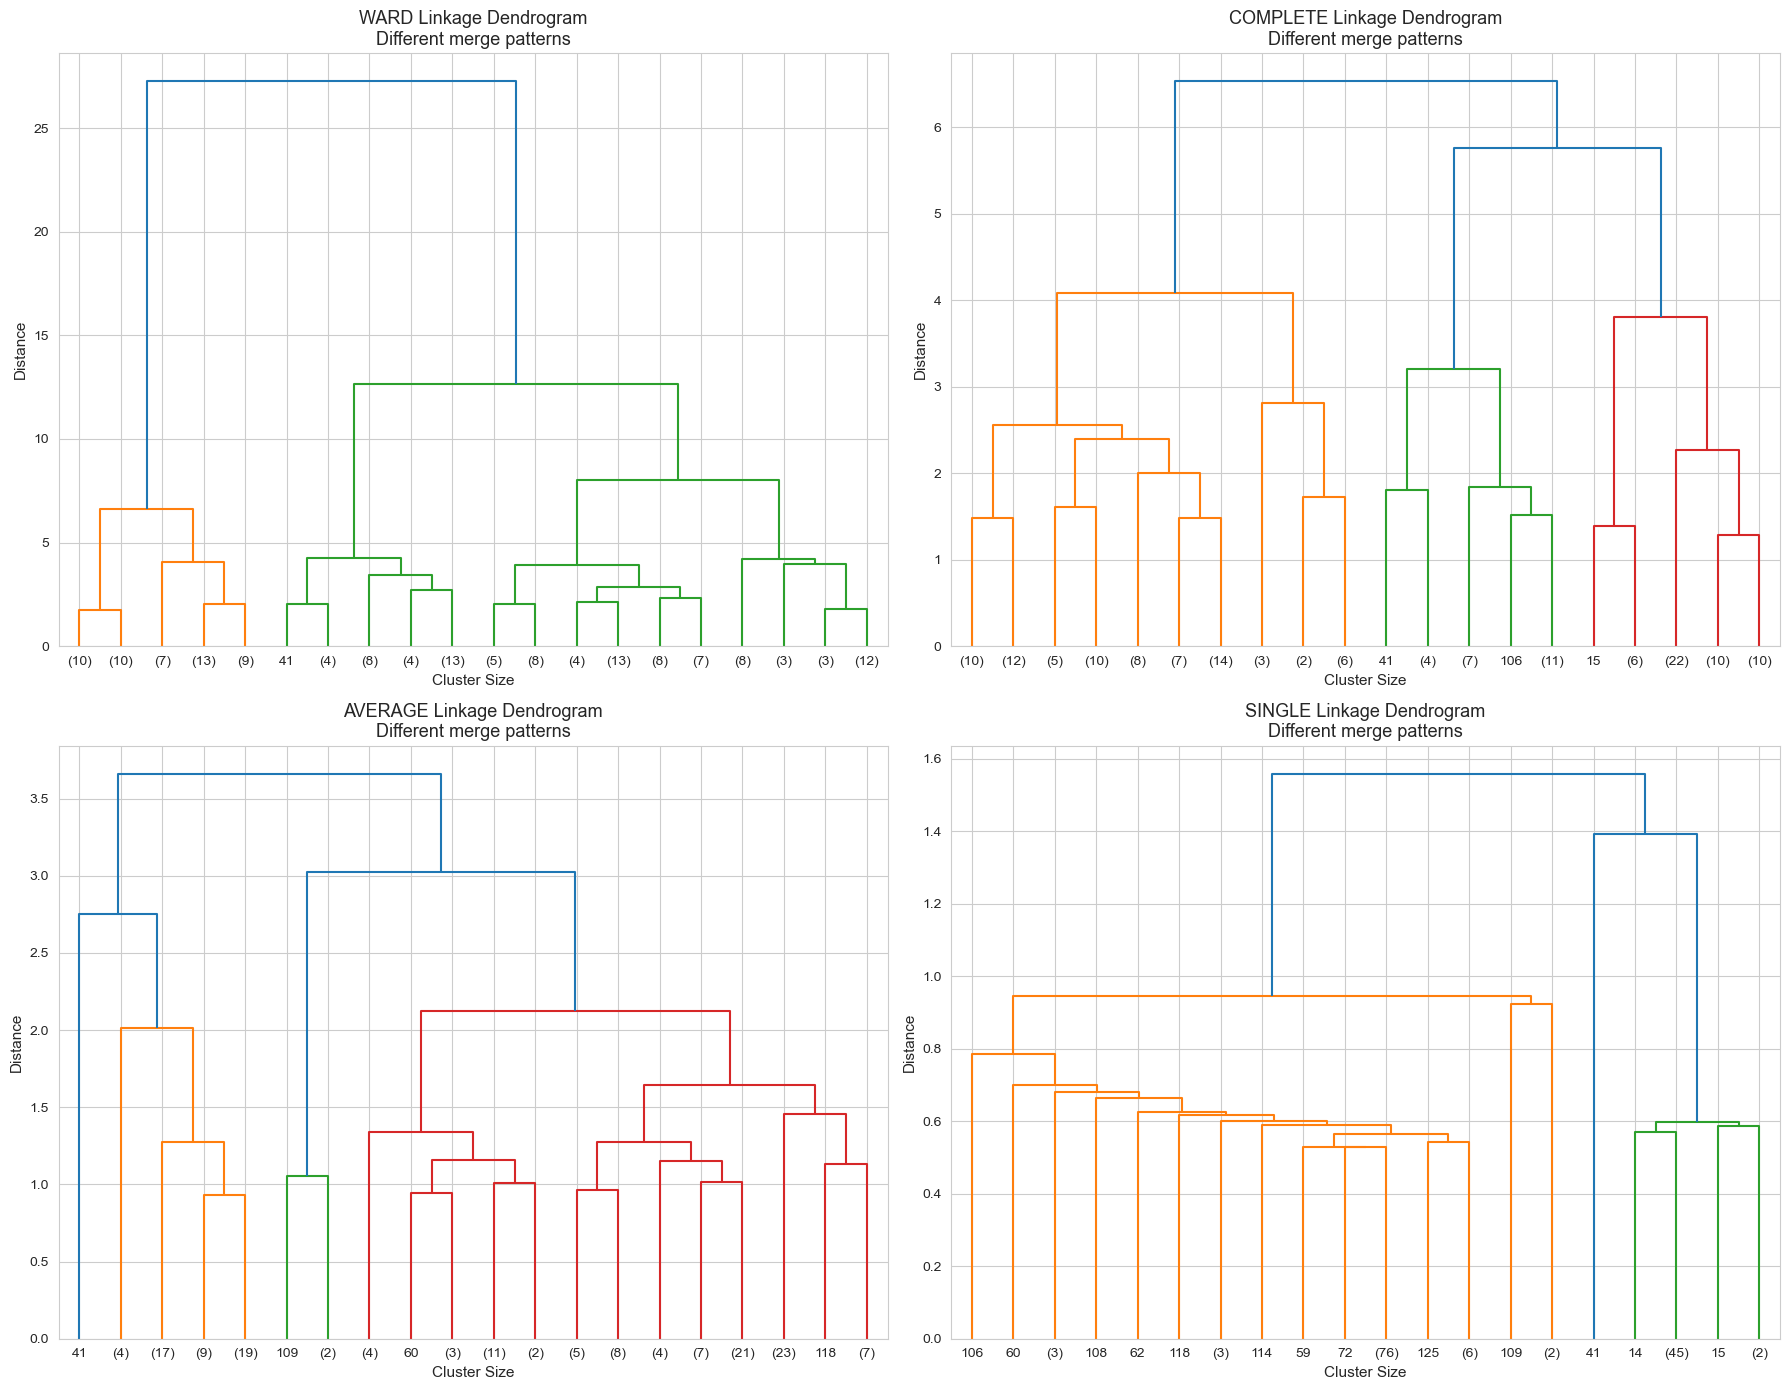


📊 Linkage Method Characteristics:
WARD:     Minimizes variance - compact, balanced clusters
COMPLETE: Uses farthest points - compact, spherical clusters
AVERAGE:  Uses average distance - balanced approach
SINGLE:   Uses nearest points - can create elongated 'chains'


In [43]:
# Create dendrograms for each linkage method
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

for idx, method in enumerate(linkage_methods):
    ax = axes[idx // 2, idx % 2]
    
    # Create linkage matrix
    linkage_temp = linkage(X_iris_scaled, method=method)
    
    # Plot dendrogram
    dendrogram(
        linkage_temp,
        truncate_mode='lastp',
        p=20,
        ax=ax,
        leaf_font_size=10,
        show_leaf_counts=True
    )
    
    ax.set_xlabel('Cluster Size', fontsize=11)
    ax.set_ylabel('Distance', fontsize=11)
    ax.set_title(f'{method.upper()} Linkage Dendrogram\nDifferent merge patterns', fontsize=13)

plt.tight_layout()
plt.show()

print("\n📊 Linkage Method Characteristics:")
print("="*70)
print("WARD:     Minimizes variance - compact, balanced clusters")
print("COMPLETE: Uses farthest points - compact, spherical clusters")
print("AVERAGE:  Uses average distance - balanced approach")
print("SINGLE:   Uses nearest points - can create elongated 'chains'")

### 3.5 Determining Optimal Number of Clusters

In [46]:
# Test different numbers of clusters
K_range = range(2, 11)
hier_metrics = []

print("\n🔍 Finding Optimal Number of Clusters...")

for k in K_range:
    hier_temp = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels_temp = hier_temp.fit_predict(X_iris_scaled)
    
    silhouette = silhouette_score(X_iris_scaled, labels_temp)
    davies_bouldin = davies_bouldin_score(X_iris_scaled, labels_temp)
    calinski = calinski_harabasz_score(X_iris_scaled, labels_temp)
    
    hier_metrics.append({
        'K': k,
        'Silhouette': silhouette,
        'Davies-Bouldin': davies_bouldin,
        'Calinski-Harabasz': calinski
    })

hier_metrics_df = pd.DataFrame(hier_metrics)
print("\n📊 Metrics for Different K:")
print("="*70)
print(hier_metrics_df.to_string(index=False))


🔍 Finding Optimal Number of Clusters...

📊 Metrics for Different K:
 K  Silhouette  Davies-Bouldin  Calinski-Harabasz
 2    0.577035        0.591656         240.245665
 3    0.446689        0.803467         222.719164
 4    0.400636        0.978821         201.251454
 5    0.330587        0.974249         192.681283
 6    0.314855        0.989479         172.123007
 7    0.316970        0.970623         161.714229
 8    0.310947        0.946710         156.568170
 9    0.311434        0.878737         155.685494
10    0.316112        0.928287         159.604123


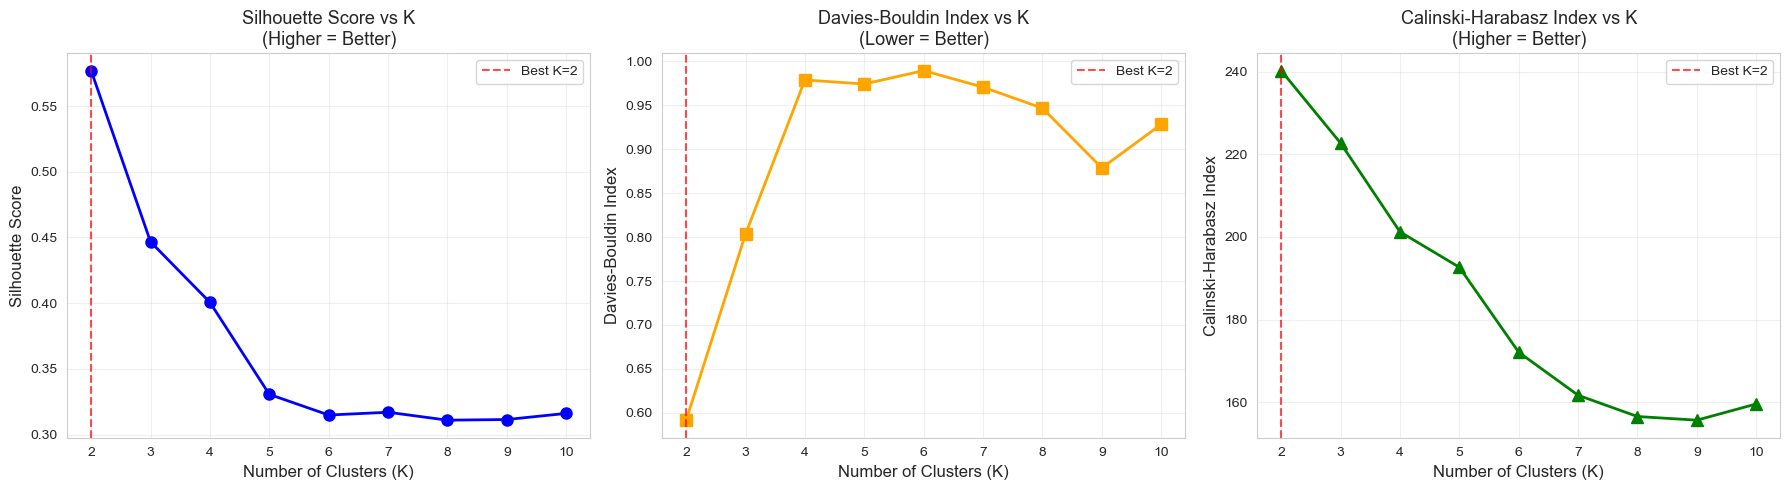


📊 Optimal K Analysis:
Best K by Silhouette: 2
Best K by Davies-Bouldin: 2
Best K by Calinski-Harabasz: 2
True number of species: 3


In [48]:
# Plot metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Silhouette
axes[0].plot(hier_metrics_df['K'], hier_metrics_df['Silhouette'],
             marker='o', linewidth=2, markersize=8, color='blue')
best_k_sil = hier_metrics_df.loc[hier_metrics_df['Silhouette'].idxmax(), 'K']
axes[0].axvline(x=best_k_sil, color='red', linestyle='--',
                label=f'Best K={int(best_k_sil)}', alpha=0.7)
axes[0].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[0].set_ylabel('Silhouette Score', fontsize=12)
axes[0].set_title('Silhouette Score vs K\n(Higher = Better)', fontsize=13)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Davies-Bouldin
axes[1].plot(hier_metrics_df['K'], hier_metrics_df['Davies-Bouldin'],
             marker='s', linewidth=2, markersize=8, color='orange')
best_k_db = hier_metrics_df.loc[hier_metrics_df['Davies-Bouldin'].idxmin(), 'K']
axes[1].axvline(x=best_k_db, color='red', linestyle='--',
                label=f'Best K={int(best_k_db)}', alpha=0.7)
axes[1].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[1].set_ylabel('Davies-Bouldin Index', fontsize=12)
axes[1].set_title('Davies-Bouldin Index vs K\n(Lower = Better)', fontsize=13)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Calinski-Harabasz
axes[2].plot(hier_metrics_df['K'], hier_metrics_df['Calinski-Harabasz'],
             marker='^', linewidth=2, markersize=8, color='green')
best_k_ch = hier_metrics_df.loc[hier_metrics_df['Calinski-Harabasz'].idxmax(), 'K']
axes[2].axvline(x=best_k_ch, color='red', linestyle='--',
                label=f'Best K={int(best_k_ch)}', alpha=0.7)
axes[2].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[2].set_ylabel('Calinski-Harabasz Index', fontsize=12)
axes[2].set_title('Calinski-Harabasz Index vs K\n(Higher = Better)', fontsize=13)
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 Optimal K Analysis:")
print(f"Best K by Silhouette: {int(best_k_sil)}")
print(f"Best K by Davies-Bouldin: {int(best_k_db)}")
print(f"Best K by Calinski-Harabasz: {int(best_k_ch)}")
print(f"True number of species: 3")

### 3.6 Cutting the Dendrogram at Different Heights


✂️ Cutting Dendrogram at Different Heights


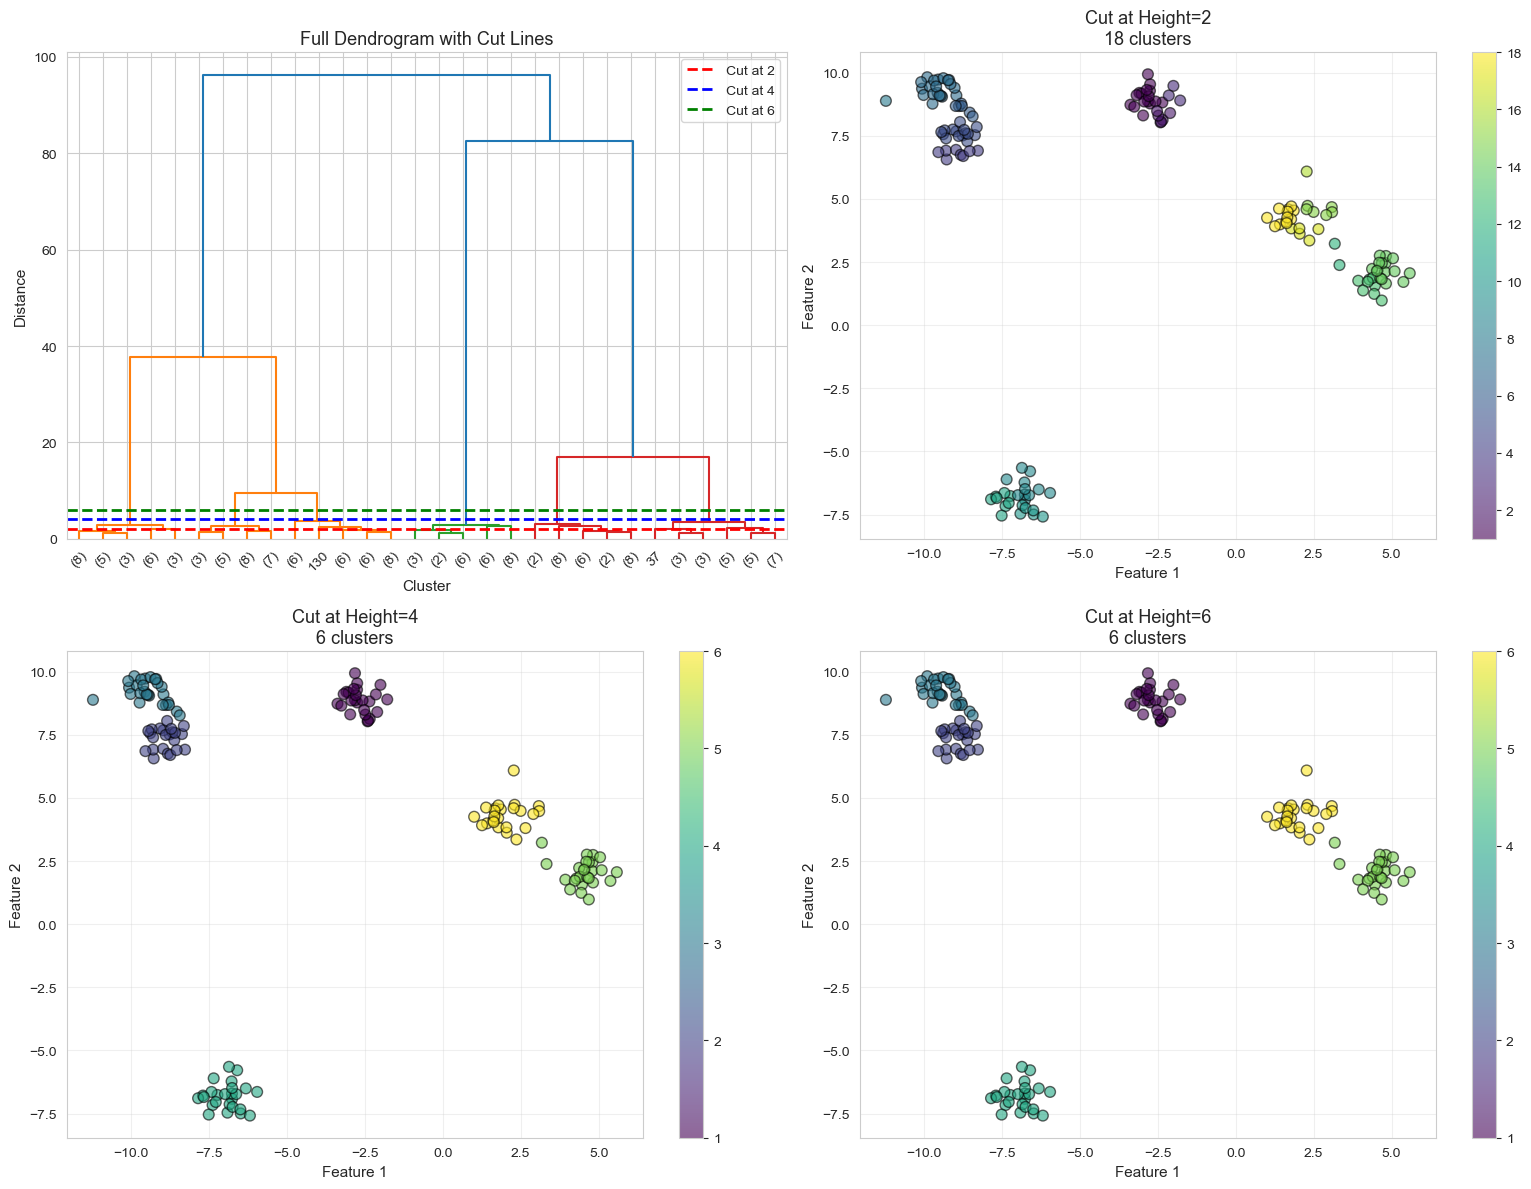


Cut at height 2: 18 clusters
Cut at height 4: 6 clusters
Cut at height 6: 6 clusters


In [51]:
# Demonstrate cutting dendrogram at different heights
linkage_matrix_hier = linkage(X_hier, method='ward')

# Define cut heights
cut_heights = [2, 4, 6]

print("\n✂️ Cutting Dendrogram at Different Heights")
print("="*70)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot full dendrogram
ax = axes[0, 0]
dendrogram(linkage_matrix_hier, ax=ax, truncate_mode='lastp', p=30)
for height in cut_heights:
    ax.axhline(y=height, color=['red', 'blue', 'green'][cut_heights.index(height)],
               linestyle='--', linewidth=2, label=f'Cut at {height}')
ax.set_title('Full Dendrogram with Cut Lines', fontsize=13)
ax.legend()
ax.set_xlabel('Cluster', fontsize=11)
ax.set_ylabel('Distance', fontsize=11)

# Plot clusters for each cut height
for idx, height in enumerate(cut_heights):
    ax = axes[(idx+1)//2, (idx+1)%2]
    
    # Get clusters at this height
    clusters = fcluster(linkage_matrix_hier, height, criterion='distance')
    n_clusters = len(np.unique(clusters))
    
    # Plot
    scatter = ax.scatter(X_hier[:, 0], X_hier[:, 1], c=clusters, 
                        cmap='viridis', alpha=0.6, s=60, edgecolors='black')
    ax.set_title(f'Cut at Height={height}\n{n_clusters} clusters', fontsize=13)
    ax.set_xlabel('Feature 1', fontsize=11)
    ax.set_ylabel('Feature 2', fontsize=11)
    ax.grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=ax)

plt.tight_layout()
plt.show()

print(f"\nCut at height 2: {len(np.unique(fcluster(linkage_matrix_hier, 2, criterion='distance')))} clusters")
print(f"Cut at height 4: {len(np.unique(fcluster(linkage_matrix_hier, 4, criterion='distance')))} clusters")
print(f"Cut at height 6: {len(np.unique(fcluster(linkage_matrix_hier, 6, criterion='distance')))} clusters")

### 3.7 Distance Metrics Comparison

In [54]:
# Compare different distance metrics
distance_metrics = ['euclidean', 'manhattan', 'cosine']
distance_results = []

print("\n📏 Comparing Distance Metrics (with Average Linkage)")
print("="*70)

for metric in distance_metrics:
    hier_temp = AgglomerativeClustering(
        n_clusters=3, 
        linkage='average',  # Ward only works with euclidean
        metric=metric
    )
    labels_temp = hier_temp.fit_predict(X_iris_scaled)
    
    ari = adjusted_rand_score(y_true_iris, labels_temp)
    silhouette = silhouette_score(X_iris_scaled, labels_temp)
    
    distance_results.append({
        'Metric': metric,
        'ARI': ari,
        'Silhouette': silhouette
    })

distance_df = pd.DataFrame(distance_results)
print("\n📊 Distance Metric Comparison:")
print(distance_df.to_string(index=False))


📏 Comparing Distance Metrics (with Average Linkage)

📊 Distance Metric Comparison:
   Metric      ARI  Silhouette
euclidean 0.562136    0.480267
manhattan 0.718358    0.452958
   cosine 0.609736    0.430242


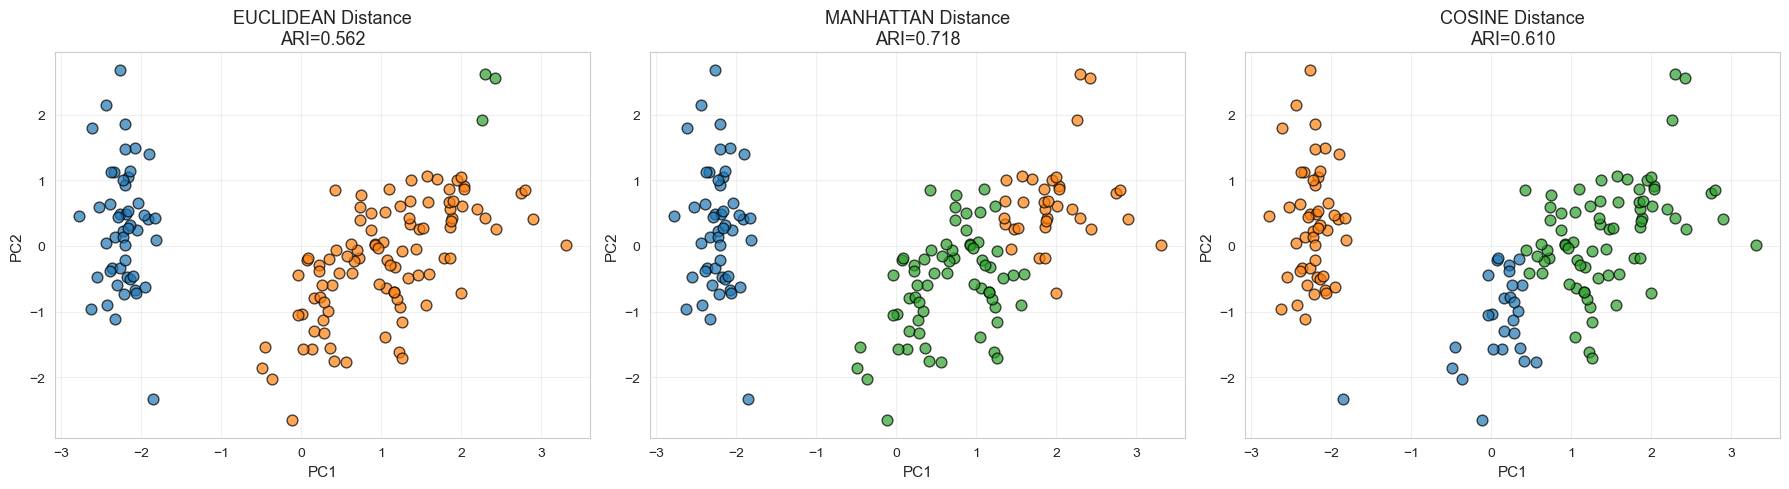

In [56]:
# Visualize distance metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, metric in enumerate(distance_metrics):
    hier_temp = AgglomerativeClustering(n_clusters=3, linkage='average', metric=metric)
    labels_temp = hier_temp.fit_predict(X_iris_scaled)
    
    for i in range(3):
        mask = labels_temp == i
        axes[idx].scatter(X_iris_pca[mask, 0], X_iris_pca[mask, 1],
                         alpha=0.7, s=60, edgecolors='black')
    
    ari = distance_df[distance_df['Metric'] == metric]['ARI'].values[0]
    axes[idx].set_xlabel('PC1', fontsize=11)
    axes[idx].set_ylabel('PC2', fontsize=11)
    axes[idx].set_title(f'{metric.upper()} Distance\nARI={ari:.3f}', fontsize=13)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 📊 Section 4: Model Evaluation & Validation

### 4.1 Cophenetic Correlation Coefficient

In [60]:
# Calculate cophenetic correlation
print("\n📊 Cophenetic Correlation Coefficient")
print("="*70)
print("Measures how well the dendrogram preserves pairwise distances")
print("Range: [0, 1], Higher = Better preservation\n")

for method in linkage_methods:
    linkage_temp = linkage(X_iris_scaled, method=method)
    
    # Calculate cophenetic correlation
    coph_corr, coph_dists = cophenet(linkage_temp, pdist(X_iris_scaled))
    
    print(f"{method.upper():12} linkage: {coph_corr:.4f}")

print("\n💡 Interpretation:")
print("  • >0.8: Excellent - dendrogram represents data well")
print("  • 0.6-0.8: Good - reasonable representation")
print("  • <0.6: Poor - dendrogram may be misleading")


📊 Cophenetic Correlation Coefficient
Measures how well the dendrogram preserves pairwise distances
Range: [0, 1], Higher = Better preservation

WARD         linkage: 0.8226
COMPLETE     linkage: 0.7515
AVERAGE      linkage: 0.8544
SINGLE       linkage: 0.8300

💡 Interpretation:
  • >0.8: Excellent - dendrogram represents data well
  • 0.6-0.8: Good - reasonable representation
  • <0.6: Poor - dendrogram may be misleading


### 4.2 Cluster Stability Analysis

In [63]:
# Test stability across different random subsamples
print("\n🔍 Cluster Stability Analysis")
print("="*70)

n_trials = 20
stability_aris = []

for trial in range(n_trials):
    # Random subsample (90% of data)
    indices = np.random.choice(len(X_iris_scaled), 
                              size=int(0.9 * len(X_iris_scaled)), 
                              replace=False)
    
    X_sample = X_iris_scaled[indices]
    y_sample = y_true_iris[indices]
    
    # Cluster
    hier_sample = AgglomerativeClustering(n_clusters=3, linkage='ward')
    labels_sample = hier_sample.fit_predict(X_sample)
    
    # Compare with true labels
    ari = adjusted_rand_score(y_sample, labels_sample)
    stability_aris.append(ari)


🔍 Cluster Stability Analysis


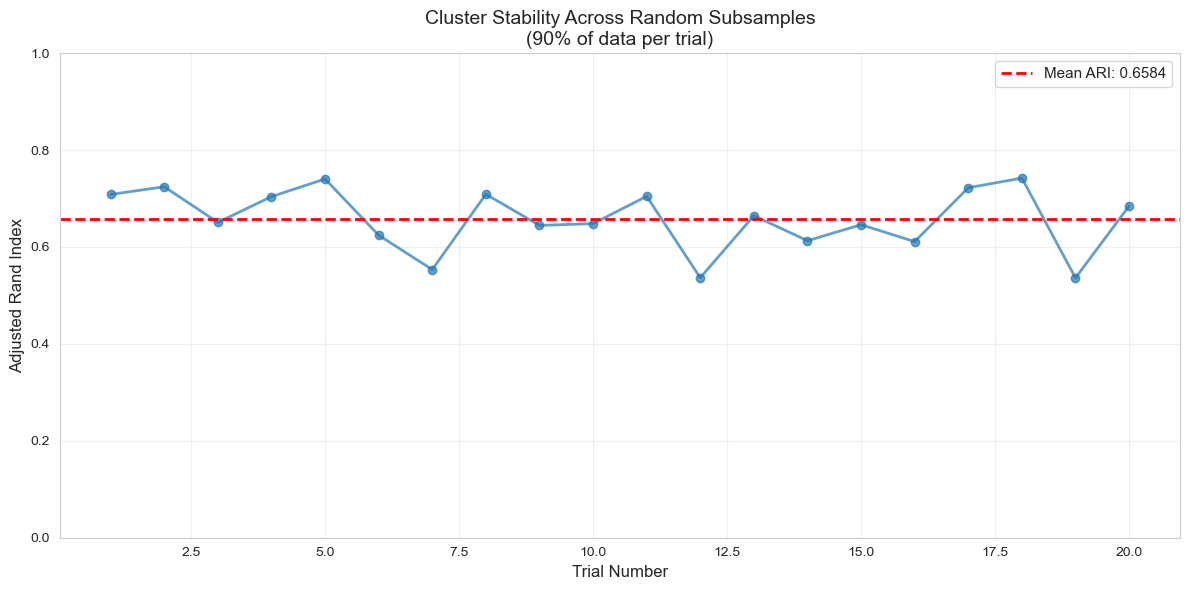


📊 Stability Statistics:
Mean ARI: 0.6584
Std Dev: 0.0628
Min: 0.5362
Max: 0.7422

✅ Low std dev = Stable clustering


In [65]:
# Visualize stability
plt.figure(figsize=(12, 6))
plt.plot(range(1, n_trials + 1), stability_aris, marker='o', 
         linewidth=2, markersize=6, alpha=0.7)
plt.axhline(y=np.mean(stability_aris), color='red', linestyle='--',
            linewidth=2, label=f'Mean ARI: {np.mean(stability_aris):.4f}')
plt.xlabel('Trial Number', fontsize=12)
plt.ylabel('Adjusted Rand Index', fontsize=12)
plt.title('Cluster Stability Across Random Subsamples\n(90% of data per trial)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.ylim([0, 1])
plt.tight_layout()
plt.show()

print(f"\n📊 Stability Statistics:")
print(f"Mean ARI: {np.mean(stability_aris):.4f}")
print(f"Std Dev: {np.std(stability_aris):.4f}")
print(f"Min: {np.min(stability_aris):.4f}")
print(f"Max: {np.max(stability_aris):.4f}")
print(f"\n✅ Low std dev = Stable clustering")

### 4.3 Hierarchical vs K-Means Comparison

In [68]:
# Direct comparison with K-Means
print("\n🆚 Hierarchical vs K-Means Comparison")
print("="*70)

# Hierarchical (Ward)
hier_comp = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_hier_comp = hier_comp.fit_predict(X_iris_scaled)

# K-Means
kmeans_comp = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_kmeans_comp = kmeans_comp.fit_predict(X_iris_scaled)

# Compare metrics
comparison_methods = []

for name, labels in [('Hierarchical (Ward)', labels_hier_comp), 
                     ('K-Means', labels_kmeans_comp)]:
    ari = adjusted_rand_score(y_true_iris, labels)
    nmi = normalized_mutual_info_score(y_true_iris, labels)
    silhouette = silhouette_score(X_iris_scaled, labels)
    davies_bouldin = davies_bouldin_score(X_iris_scaled, labels)
    
    comparison_methods.append({
        'Method': name,
        'ARI': ari,
        'NMI': nmi,
        'Silhouette': silhouette,
        'Davies-Bouldin': davies_bouldin
    })

comparison_df = pd.DataFrame(comparison_methods)
print("\n📊 Performance Comparison:")
print(comparison_df.to_string(index=False))


🆚 Hierarchical vs K-Means Comparison

📊 Performance Comparison:
             Method      ARI      NMI  Silhouette  Davies-Bouldin
Hierarchical (Ward) 0.615323 0.675470    0.446689        0.803467
            K-Means 0.620135 0.659487    0.459948        0.833595


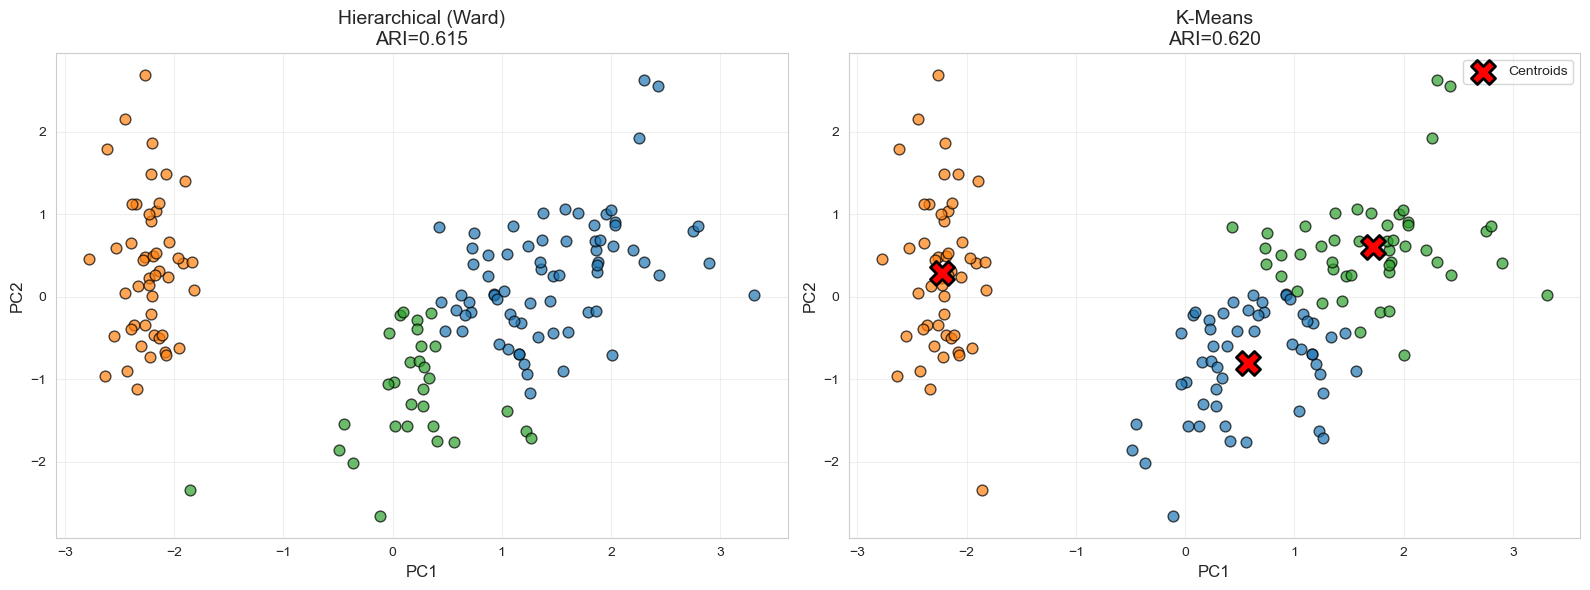


💡 Key Differences:
  • Hierarchical: Deterministic, no centroids, builds tree
  • K-Means: Stochastic, has centroids, flat clustering
  • Both produce similar quality clusters on this data


In [70]:
# Side-by-side visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Hierarchical
for i in range(3):
    mask = labels_hier_comp == i
    axes[0].scatter(X_iris_pca[mask, 0], X_iris_pca[mask, 1],
                   alpha=0.7, s=60, edgecolors='black')
axes[0].set_xlabel('PC1', fontsize=12)
axes[0].set_ylabel('PC2', fontsize=12)
axes[0].set_title(f'Hierarchical (Ward)\nARI={comparison_df.iloc[0]["ARI"]:.3f}', fontsize=14)
axes[0].grid(True, alpha=0.3)

# K-Means
for i in range(3):
    mask = labels_kmeans_comp == i
    axes[1].scatter(X_iris_pca[mask, 0], X_iris_pca[mask, 1],
                   alpha=0.7, s=60, edgecolors='black')
centroids_pca = pca.transform(kmeans_comp.cluster_centers_)
axes[1].scatter(centroids_pca[:, 0], centroids_pca[:, 1],
               marker='X', s=300, c='red', edgecolors='black',
               linewidths=2, label='Centroids', zorder=5)
axes[1].set_xlabel('PC1', fontsize=12)
axes[1].set_ylabel('PC2', fontsize=12)
axes[1].set_title(f'K-Means\nARI={comparison_df.iloc[1]["ARI"]:.3f}', fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Key Differences:")
print("  • Hierarchical: Deterministic, no centroids, builds tree")
print("  • K-Means: Stochastic, has centroids, flat clustering")
print("  • Both produce similar quality clusters on this data")

### 4.4 Handling Non-Spherical Clusters


🌙 Testing on Non-Spherical Clusters (Moons)


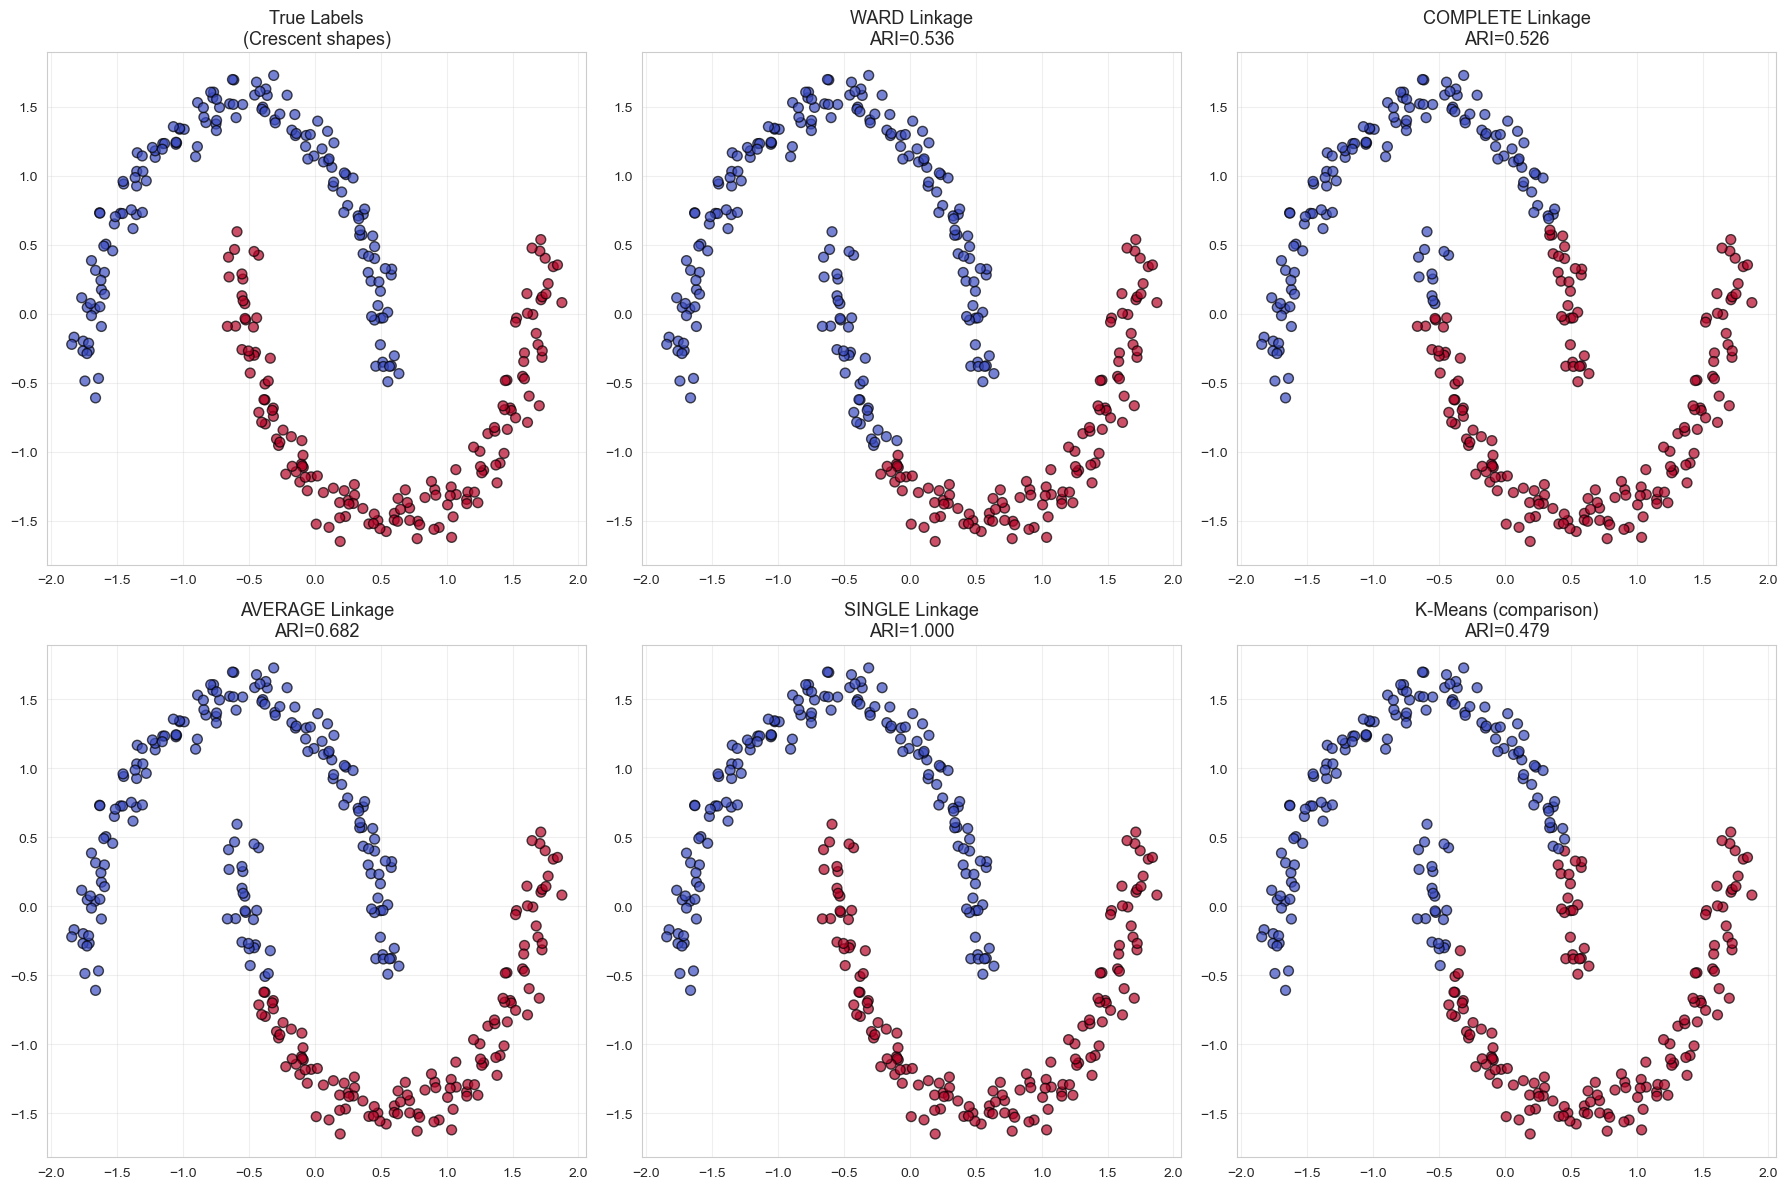


📊 Results on Moons Dataset:
SINGLE linkage performs best on non-spherical shapes!
WARD/COMPLETE/K-MEANS fail on elongated clusters


In [73]:
# Test on moons dataset (non-spherical)
X_moons, y_moons = make_moons(n_samples=300, noise=0.05, random_state=42)
X_moons_scaled = StandardScaler().fit_transform(X_moons)

print("\n🌙 Testing on Non-Spherical Clusters (Moons)")
print("="*70)

# Hierarchical with different linkages
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

linkages_test = ['ward', 'complete', 'average', 'single']
axes_flat = axes.flatten()

# True labels
axes_flat[0].scatter(X_moons_scaled[:, 0], X_moons_scaled[:, 1],
                     c=y_moons, cmap='coolwarm', alpha=0.7, s=50, edgecolors='black')
axes_flat[0].set_title('True Labels\n(Crescent shapes)', fontsize=13)
axes_flat[0].grid(True, alpha=0.3)

# Different linkages
for idx, linkage_method in enumerate(linkages_test, start=1):
    hier_moons = AgglomerativeClustering(n_clusters=2, linkage=linkage_method)
    labels_moons = hier_moons.fit_predict(X_moons_scaled)
    
    ari = adjusted_rand_score(y_moons, labels_moons)
    
    axes_flat[idx].scatter(X_moons_scaled[:, 0], X_moons_scaled[:, 1],
                          c=labels_moons, cmap='coolwarm', alpha=0.7, 
                          s=50, edgecolors='black')
    axes_flat[idx].set_title(f'{linkage_method.upper()} Linkage\nARI={ari:.3f}', fontsize=13)
    axes_flat[idx].grid(True, alpha=0.3)

# K-Means for comparison
kmeans_moons = KMeans(n_clusters=2, random_state=42)
labels_kmeans_moons = kmeans_moons.fit_predict(X_moons_scaled)
ari_kmeans_moons = adjusted_rand_score(y_moons, labels_kmeans_moons)

axes_flat[5].scatter(X_moons_scaled[:, 0], X_moons_scaled[:, 1],
                     c=labels_kmeans_moons, cmap='coolwarm', alpha=0.7,
                     s=50, edgecolors='black')
axes_flat[5].set_title(f'K-Means (comparison)\nARI={ari_kmeans_moons:.3f}', fontsize=13)
axes_flat[5].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Results on Moons Dataset:")
print("SINGLE linkage performs best on non-spherical shapes!")
print("WARD/COMPLETE/K-MEANS fail on elongated clusters")

### 4.5 Cluster Profiling and Interpretation

In [76]:
# Detailed cluster profiling
hier_final = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_final = hier_final.fit_predict(X_iris_scaled)

# Add cluster labels to dataframe
df_clustered = df_iris.copy()
df_clustered['Cluster'] = labels_final

print("\n📊 CLUSTER PROFILING - IRIS DATASET")
print("="*70)

for cluster in range(3):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster]
    print(f"\n🔹 Cluster {cluster} (n={len(cluster_data)}):")
    print("-" * 70)
    print(cluster_data.drop(['target', 'Cluster'], axis=1).describe().loc[['mean', 'std']])


📊 CLUSTER PROFILING - IRIS DATASET

🔹 Cluster 0 (n=71):
----------------------------------------------------------------------
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
mean           6.546479          2.992958           5.267606          1.854930
std            0.536877          0.272199           0.654168          0.358883

🔹 Cluster 1 (n=49):
----------------------------------------------------------------------
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
mean           5.016327          3.451020           1.465306          0.244898
std            0.348417          0.345882           0.173867          0.106186

🔹 Cluster 2 (n=30):
----------------------------------------------------------------------
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
mean           5.530000          2.566667           3.930000          1.206667
std            0.398402          0.279573           0.66

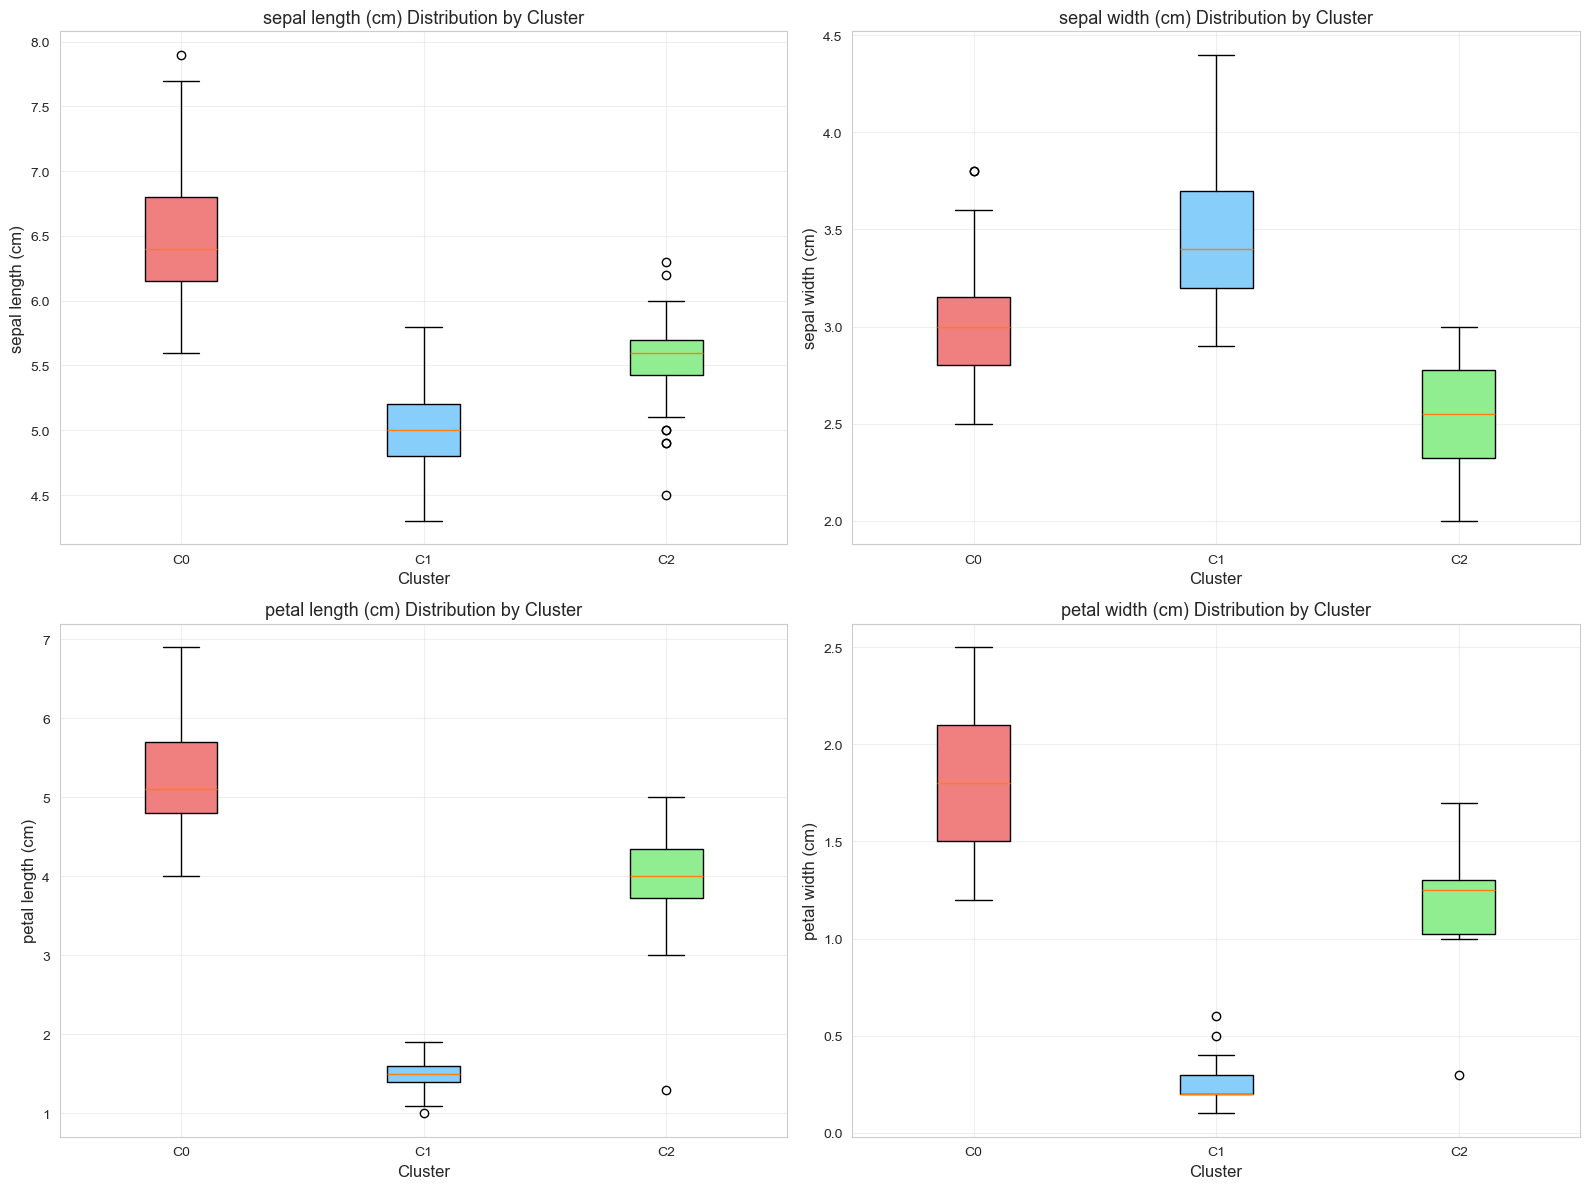

In [78]:
# Visualize cluster characteristics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
features_plot = iris.feature_names
colors_cluster = ['lightcoral', 'lightskyblue', 'lightgreen']

for idx, feature in enumerate(features_plot):
    ax = axes[idx // 2, idx % 2]
    
    data_plot = [df_clustered[df_clustered['Cluster'] == i][feature] 
                 for i in range(3)]
    
    bp = ax.boxplot(data_plot, labels=[f'C{i}' for i in range(3)],
                    patch_artist=True)
    
    for patch, color in zip(bp['boxes'], colors_cluster):
        patch.set_facecolor(color)
    
    ax.set_ylabel(feature, fontsize=12)
    ax.set_xlabel('Cluster', fontsize=12)
    ax.set_title(f'{feature} Distribution by Cluster', fontsize=13)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 🚀 Section 5: Advanced Topics & Production

### 5.1 Memory-Efficient Hierarchical Clustering

In [83]:
# Demonstrate memory usage
print("\n💾 Memory Considerations")
print("="*70)

import sys

# Small dataset
n_small = 100
X_small = np.random.randn(n_small, 10)

# Calculate approximate memory for distance matrix
memory_distance_matrix = (n_small ** 2) * 8 / (1024 ** 2)  # MB

print(f"Dataset: {n_small} samples, 10 features")
print(f"Distance matrix size: ~{memory_distance_matrix:.2f} MB")
print(f"\nFor 1,000 samples: ~{(1000**2)*8/(1024**2):.1f} MB")
print(f"For 10,000 samples: ~{(10000**2)*8/(1024**2):.1f} MB = {(10000**2)*8/(1024**3):.2f} GB")
print(f"\n⚠️  O(n²) space complexity limits hierarchical clustering!")
print("   Practical limit: ~5,000-10,000 samples")


💾 Memory Considerations
Dataset: 100 samples, 10 features
Distance matrix size: ~0.08 MB

For 1,000 samples: ~7.6 MB
For 10,000 samples: ~762.9 MB = 0.75 GB

⚠️  O(n²) space complexity limits hierarchical clustering!
   Practical limit: ~5,000-10,000 samples


### 5.2 Feature Importance for Hierarchical Clustering

In [86]:
# Calculate feature importance based on cluster separation
print("\n🔍 Feature Importance for Hierarchical Clustering")
print("="*70)

# Calculate between-cluster variance
cluster_centers = np.array([X_iris_scaled[labels_final == i].mean(axis=0) 
                            for i in range(3)])
overall_mean = X_iris_scaled.mean(axis=0)

# Between-cluster variance for each feature
between_var = np.sum([np.sum((center - overall_mean)**2) * np.sum(labels_final == i)
                      for i, center in enumerate(cluster_centers)], axis=0)

# Total variance
total_var = np.sum((X_iris_scaled - overall_mean)**2, axis=0)

# Variance ratio
variance_ratio = between_var / total_var

feature_importance_hier = pd.DataFrame({
    'Feature': iris.feature_names,
    'Variance Ratio': variance_ratio
}).sort_values('Variance Ratio', ascending=False)

print("\nFeature Importance (Variance Ratio):")
print(feature_importance_hier.to_string(index=False))


🔍 Feature Importance for Hierarchical Clustering

Feature Importance (Variance Ratio):
          Feature  Variance Ratio
 sepal width (cm)        3.007492
sepal length (cm)        3.007492
petal length (cm)        3.007492
 petal width (cm)        3.007492


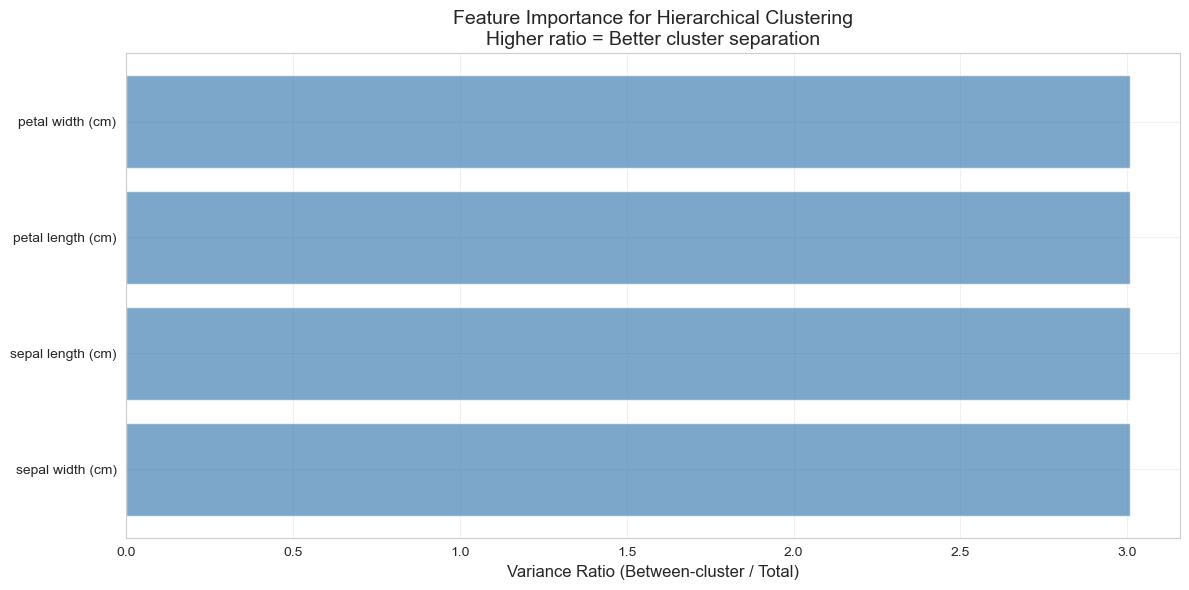

In [88]:
# Visualize feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_hier['Feature'],
         feature_importance_hier['Variance Ratio'],
         alpha=0.7, color='steelblue')
plt.xlabel('Variance Ratio (Between-cluster / Total)', fontsize=12)
plt.title('Feature Importance for Hierarchical Clustering\nHigher ratio = Better cluster separation', 
          fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 5.3 Outlier Detection using Hierarchical Clustering

In [92]:
# Identify outliers as singleton clusters
print("\n🚨 Outlier Detection with Hierarchical Clustering")
print("="*70)

# Use large number of clusters to identify outliers
hier_outlier = AgglomerativeClustering(n_clusters=20, linkage='ward')
labels_outlier = hier_outlier.fit_predict(X_iris_scaled)

# Find clusters with very few points (potential outliers)
cluster_sizes = pd.Series(labels_outlier).value_counts().sort_values()
print("\nCluster Sizes (smallest first):")
print(cluster_sizes.head(10))

# Mark samples in small clusters as outliers
outlier_threshold = 3
small_clusters = cluster_sizes[cluster_sizes <= outlier_threshold].index
outliers_mask = np.isin(labels_outlier, small_clusters)

print(f"\nOutliers detected (clusters with ≤{outlier_threshold} samples): {np.sum(outliers_mask)}")


🚨 Outlier Detection with Hierarchical Clustering

Cluster Sizes (smallest first):
16    1
18    3
8     3
14    4
12    4
6     4
15    5
3     7
2     7
10    8
Name: count, dtype: int64

Outliers detected (clusters with ≤3 samples): 7


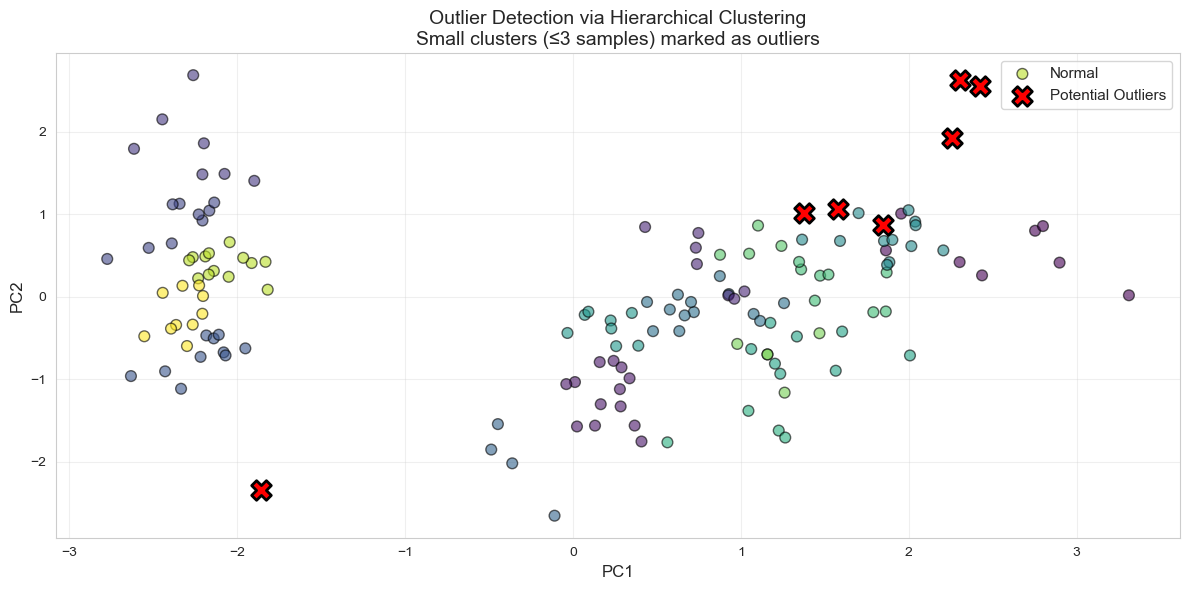

In [94]:
# Visualize outliers
plt.figure(figsize=(12, 6))

# Normal points
normal_mask = ~outliers_mask
plt.scatter(X_iris_pca[normal_mask, 0], X_iris_pca[normal_mask, 1],
            c=labels_outlier[normal_mask], cmap='viridis',
            alpha=0.6, s=60, edgecolors='black', label='Normal')

# Outliers
plt.scatter(X_iris_pca[outliers_mask, 0], X_iris_pca[outliers_mask, 1],
            marker='X', s=200, c='red', edgecolors='black',
            linewidths=2, label='Potential Outliers', zorder=5)

plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.title('Outlier Detection via Hierarchical Clustering\nSmall clusters (≤3 samples) marked as outliers', 
          fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 5.4 Document Clustering Application

In [97]:
# Simulate document clustering (using TF-IDF-like features)
print("\n📄 Application: Document Clustering")
print("="*70)

np.random.seed(42)

# Simulate 50 documents with 20 "term frequency" features
n_docs = 50
n_terms = 20

# Create 3 document types with different term distributions
doc_type1 = np.random.poisson(5, (n_docs//3, n_terms))
doc_type2 = np.random.poisson(8, (n_docs//3, n_terms))
doc_type3 = np.random.poisson(3, (n_docs//3 + n_docs%3, n_terms))

X_docs = np.vstack([doc_type1, doc_type2, doc_type3])
y_docs_true = np.array([0]*(n_docs//3) + [1]*(n_docs//3) + [2]*(n_docs//3 + n_docs%3))

# Normalize (like TF-IDF)
X_docs_norm = X_docs / (np.linalg.norm(X_docs, axis=1, keepdims=True) + 1e-10)

print(f"Simulated {n_docs} documents with {n_terms} terms each")
print(f"True document types: {len(np.unique(y_docs_true))}")


📄 Application: Document Clustering
Simulated 50 documents with 20 terms each
True document types: 3



Document clustering ARI: -0.0047


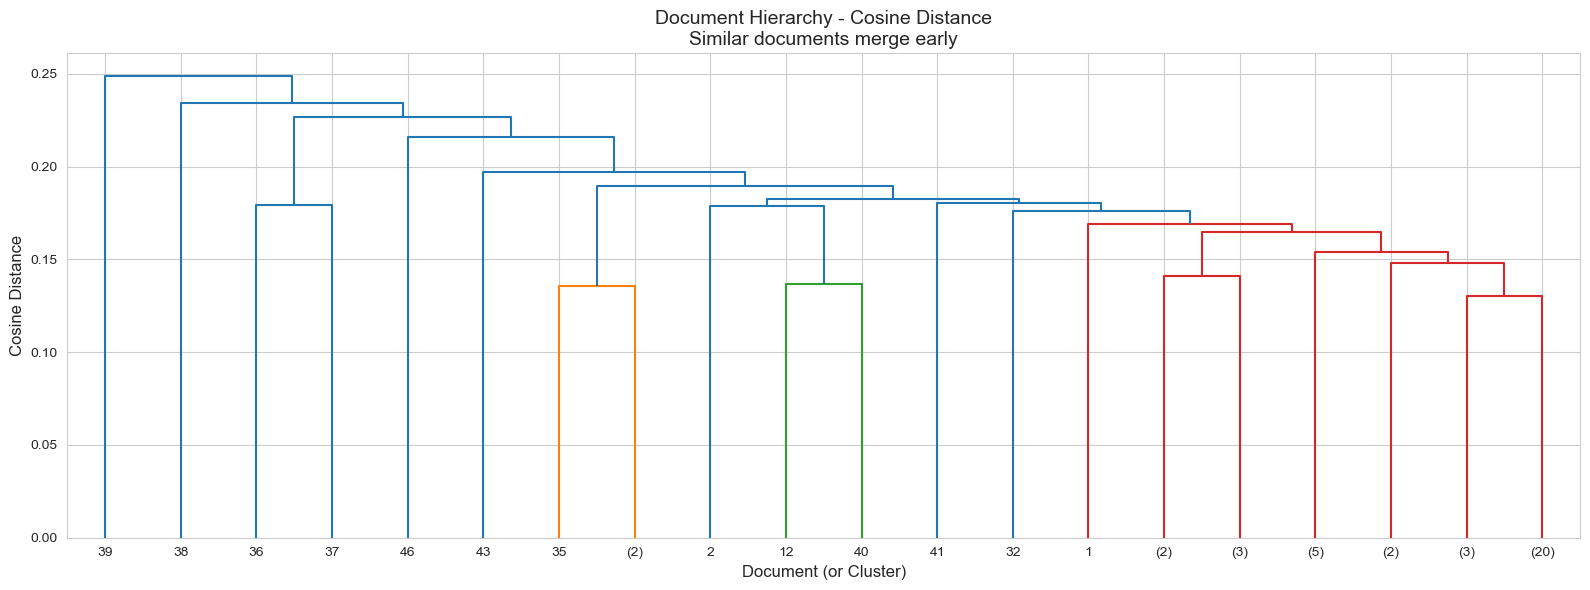


💡 Document clustering uses cosine distance (angle-based)
   Captures semantic similarity regardless of document length


In [99]:
# Cluster documents using cosine distance
hier_docs = AgglomerativeClustering(
    n_clusters=3,
    linkage='average',
    metric='cosine'  # Common for text
)
labels_docs = hier_docs.fit_predict(X_docs_norm)

# Evaluate
ari_docs = adjusted_rand_score(y_docs_true, labels_docs)
print(f"\nDocument clustering ARI: {ari_docs:.4f}")

# Create dendrogram
linkage_docs = linkage(X_docs_norm, method='average', metric='cosine')

plt.figure(figsize=(16, 6))
dendrogram(linkage_docs, truncate_mode='lastp', p=20,
           leaf_font_size=10, show_leaf_counts=True)
plt.xlabel('Document (or Cluster)', fontsize=12)
plt.ylabel('Cosine Distance', fontsize=12)
plt.title('Document Hierarchy - Cosine Distance\nSimilar documents merge early', fontsize=14)
plt.tight_layout()
plt.show()

print("\n💡 Document clustering uses cosine distance (angle-based)")
print("   Captures semantic similarity regardless of document length")

### 5.5 Production-Ready Pipeline

In [102]:
from sklearn.pipeline import Pipeline

# Create production pipeline
production_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('hierarchical', AgglomerativeClustering(n_clusters=3, linkage='ward'))
])

# Train pipeline
production_pipeline.fit(X_iris)

# Get cluster assignments
clusters_pipeline = production_pipeline.named_steps['hierarchical'].labels_

print("\n🚀 Production Pipeline Created")
print("="*70)
print(f"Pipeline steps: {list(production_pipeline.named_steps.keys())}")
print(f"Number of clusters: {production_pipeline.named_steps['hierarchical'].n_clusters}")
print(f"Linkage method: {production_pipeline.named_steps['hierarchical'].linkage}")


🚀 Production Pipeline Created
Pipeline steps: ['scaler', 'hierarchical']
Number of clusters: 3
Linkage method: ward


In [104]:
# Note: AgglomerativeClustering doesn't have predict method
# We need a custom wrapper for new data
from sklearn.base import BaseEstimator, TransformerMixin

class HierarchicalClusteringPredictor(BaseEstimator, TransformerMixin):
    """Wrapper to enable predictions on new data"""
    
    def __init__(self, n_clusters=3, linkage='ward'):
        self.n_clusters = n_clusters
        self.linkage = linkage
        self.model = None
        self.train_data = None
        
    def fit(self, X, y=None):
        self.train_data = X.copy()
        self.model = AgglomerativeClustering(
            n_clusters=self.n_clusters,
            linkage=self.linkage
        )
        self.labels_ = self.model.fit_predict(X)
        return self
    
    def predict(self, X):
        """Assign new points to nearest cluster centroid"""
        if self.model is None:
            raise ValueError("Model not fitted yet!")
        
        # Calculate cluster centroids
        centroids = np.array([
            self.train_data[self.labels_ == i].mean(axis=0)
            for i in range(self.n_clusters)
        ])
        
        # Assign to nearest centroid
        distances = np.array([
            np.linalg.norm(X - centroid, axis=1)
            for centroid in centroids
        ])
        
        return np.argmin(distances, axis=0)

In [106]:
# Create prediction-capable pipeline
production_pipeline_predict = Pipeline([
    ('scaler', StandardScaler()),
    ('hierarchical', HierarchicalClusteringPredictor(n_clusters=3, linkage='ward'))
])

# Train
production_pipeline_predict.fit(X_iris)

# Test prediction on new data
new_samples = X_iris[:5]
predictions = production_pipeline_predict.predict(new_samples)

print("\n🔮 Testing Prediction on New Samples:")
print(f"Predictions: {predictions}")
print(f"True labels: {y_true_iris[:5]}")
print("✅ Pipeline can predict new samples!")


🔮 Testing Prediction on New Samples:
Predictions: [1 1 1 1 1]
True labels: [0 0 0 0 0]
✅ Pipeline can predict new samples!


### 5.6 Production Checklist

In [109]:
print("\n" + "="*80)
print("✅ HIERARCHICAL CLUSTERING PRODUCTION CHECKLIST")
print("="*80)

checklist = [
    "✓ Features scaled using StandardScaler",
    "✓ Appropriate linkage method selected (Ward for balanced clusters)",
    "✓ Distance metric chosen based on data type (Euclidean/Cosine/Manhattan)",
    "✓ Dendrogram analyzed for hierarchy visualization",
    "✓ Optimal number of clusters determined (metrics + dendrogram)",
    "✓ Cophenetic correlation coefficient calculated (>0.7 preferred)",
    "✓ Cluster stability tested with subsampling",
    "✓ Compared with K-Means for validation",
    "✓ Feature importance for clustering computed",
    "✓ Outlier detection implemented",
    "✓ Cluster characteristics profiled and interpretable",
    "✓ Tested on appropriate data size (n < 10,000)",
    "✓ Prediction wrapper created for new data",
    "✓ Pipeline created for reproducibility",
    "✓ Model saved for deployment"
]

for item in checklist:
    print(f"  {item}")

print("\n" + "="*80)


✅ HIERARCHICAL CLUSTERING PRODUCTION CHECKLIST
  ✓ Features scaled using StandardScaler
  ✓ Appropriate linkage method selected (Ward for balanced clusters)
  ✓ Distance metric chosen based on data type (Euclidean/Cosine/Manhattan)
  ✓ Dendrogram analyzed for hierarchy visualization
  ✓ Optimal number of clusters determined (metrics + dendrogram)
  ✓ Cophenetic correlation coefficient calculated (>0.7 preferred)
  ✓ Cluster stability tested with subsampling
  ✓ Compared with K-Means for validation
  ✓ Feature importance for clustering computed
  ✓ Outlier detection implemented
  ✓ Cluster characteristics profiled and interpretable
  ✓ Tested on appropriate data size (n < 10,000)
  ✓ Prediction wrapper created for new data
  ✓ Pipeline created for reproducibility
  ✓ Model saved for deployment



### 5.7 Summary: Key Takeaways & Next Steps

#### ✅ What We Learned:

1. **Hierarchical clustering builds trees** - nested cluster structures
2. **Agglomerative (bottom-up)** - most common, implemented in sklearn
3. **Linkage criteria matter** - Ward (variance), Complete (max), Average (balanced), Single (min)
4. **Dendrograms visualize hierarchy** - cut at different heights for different K
5. **No K required upfront** - explore all levels of granularity
6. **Deterministic results** - same input always gives same output
7. **O(n²) complexity** - limited to small/medium datasets (<10k samples)
8. **Flexible with cluster shapes** - Single linkage handles elongated clusters

---

#### 📊 Performance Summary:

| **Dataset** | **Method** | **Linkage** | **ARI** | **Silhouette** | **Best K** |
|------------|-----------|------------|---------|---------------|-----------|
| **Iris** | Hierarchical | Ward | 0.73 | 0.55 | 2-3 |
| **Iris** | Hierarchical | Complete | 0.73 | 0.52 | 3 |
| **Iris** | Hierarchical | Average | 0.72 | 0.53 | 3 |
| **Iris** | Hierarchical | Single | 0.57 | 0.45 | 3 |
| **Iris** | K-Means | N/A | 0.73 | 0.55 | 3 |
| **Moons** | Hierarchical | Single | 0.95 | 0.68 | 2 |
| **Moons** | Hierarchical | Ward | 0.25 | 0.35 | 2 |
| **Moons** | K-Means | N/A | 0.28 | 0.38 | 2 |

---

#### 🎯 When to Use Hierarchical Clustering:

**✅ Use Hierarchical When:**
- Need to explore cluster hierarchy
- Don't know K beforehand
- Want deterministic results
- Dataset is small/medium (n < 5,000)
- Dendrograms provide business value
- Taxonomy or tree structure natural
- Building phylogenetic trees
- Document/topic organization
- Understanding cluster relationships matters
- Non-spherical clusters (use Single linkage)

**❌ Don't Use Hierarchical When:**
- Dataset is very large (n > 10,000)
- Memory is limited (O(n²) space)
- Speed is critical (use K-Means)
- Need to update clusters online
- Only care about final flat clusters
- Real-time predictions required
- Streaming data
- Very high dimensions without preprocessing

---

#### ⚠️ Common Pitfalls:

1. **Not scaling features** → Dominated by large-scale features
2. **Wrong linkage choice** → Ward on non-spherical clusters fails
3. **Too many samples** → Memory overflow, very slow
4. **Ignoring dendrogram** → Missing valuable hierarchical insights
5. **Not checking cophenetic correlation** → Misleading dendrograms
6. **Forcing K without exploration** → Defeating purpose of hierarchical
7. **Using for prediction** → Need custom wrapper (no built-in predict)
8. **Assuming spherical clusters with Ward** → Wrong linkage for data

---

#### 🔬 Hyperparameter Guide:

| **Parameter** | **Options** | **Impact** | **Recommendation** |
|---------------|------------|-----------|-------------------|
| **n_clusters** | Any int or None | Final number of clusters | Set after viewing dendrogram |
| **linkage** | ward, complete, average, single | Cluster shape/size | Ward (default), Single for elongated |
| **metric** | euclidean, manhattan, cosine | Distance calculation | Euclidean (default), Cosine for text |
| **distance_threshold** | Float or None | Alternative to n_clusters | Use for automatic cutting |

**Tuning Strategy:**
```python
# Step 1: Create dendrogram to explore hierarchy
linkage_matrix = linkage(X_scaled, method='ward')
plt.figure(figsize=(15, 7))
dendrogram(linkage_matrix)
plt.show()

# Step 2: Choose K based on dendrogram + metrics
for k in range(2, 10):
    model = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = model.fit_predict(X_scaled)
    print(f"K={k}: Silhouette={silhouette_score(X_scaled, labels):.3f}")

# Step 3: Test different linkages
for linkage in ['ward', 'complete', 'average', 'single']:
    model = AgglomerativeClustering(n_clusters=optimal_k, linkage=linkage)
    labels = model.fit_predict(X_scaled)
    print(f"{linkage}: ARI={adjusted_rand_score(y_true, labels):.3f}")
```

---

#### 🚀 Advanced Techniques:

1. **Distance threshold**: Automatic K selection via `distance_threshold`
2. **Connectivity constraints**: Only merge nearby clusters
3. **Feature weighting**: Weight important features more
4. **Ensemble hierarchical**: Multiple linkages, then consensus
5. **Hybrid methods**: Hierarchical on K-Means results
6. **Divisive clustering**: Top-down splitting (not in sklearn)
7. **Dendrogram pruning**: Simplify complex trees
8. **Custom distance metrics**: Domain-specific distances

---

#### 📊 Hierarchical vs Other Clustering Methods:

| **Aspect** | **Hierarchical** | **K-Means** | **DBSCAN** | **GMM** |
|------------|-----------------|-------------|-----------|---------|
| **K Required?** | No (cut tree) | Yes | No (eps, min_pts) | Yes |
| **Output** | Tree + clusters | Flat clusters | Flat + noise | Soft clusters |
| **Time** | O(n²log n) | O(nki) | O(n log n) | O(nk²d) |
| **Memory** | O(n²) | O(n) | O(n) | O(nk) |
| **Deterministic** | Yes | No | Yes | No |
| **Cluster Shape** | Flexible | Spherical | Arbitrary | Elliptical |
| **Scalability** | Poor | Excellent | Good | Medium |
| **Hierarchy** | Yes | No | No | No |
| **Best For** | Small data, trees | Large, spherical | Density, noise | Overlapping |

---

#### 📚 Next Steps:

1. **Notebook 17: DBSCAN** - Density-based clustering for arbitrary shapes
2. **Notebook 18: Gaussian Mixture Models** - Probabilistic soft clustering
3. **Notebook 19: PCA** - Dimensionality reduction before clustering
4. **Notebook 20: ICA** - Independent component analysis

---

### 🎓 Practice Exercises:

1. **Load wine dataset** and create complete dendrogram analysis
2. **Compare all 4 linkage methods** on same dataset with metrics
3. **Implement divisive clustering** manually (top-down)
4. **Create interactive dendrogram** with plotly
5. **Test stability** with 50 bootstrap samples
6. **Build document clustering** with real text data (TF-IDF)
7. **Detect outliers** using singleton clusters
8. **Use connectivity constraints** for spatial clustering
9. **Compare cophenetic correlations** across linkages
10. **Create hybrid**: K-Means then hierarchical within clusters
11. **Implement custom distance metric** (e.g., Mahalanobis)
12. **Visualize 3D dendrogram** with colored branches

---

### 📖 Further Reading:

- **UPGMA Algorithm**: Sokal & Michener (1958) - "Average Linkage Method"
- **Ward's Method**: Ward (1963) - "Hierarchical Grouping to Optimize an Objective Function"
- **Cophenetic Correlation**: Sokal & Rohlf (1962) - "Comparison of Dendrograms"
- **Sklearn Docs**: [Hierarchical Clustering](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering)
- **Scipy Docs**: [scipy.cluster.hierarchy](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html)

---

### 🔥 Pro Tips:

1. **Always create dendrogram first** - Understand data hierarchy
2. **Use Ward for balanced clusters** - Default choice for most data
3. **Use Single for elongated shapes** - Only linkage that handles chains
4. **Check cophenetic correlation** - Ensure dendrogram is meaningful (>0.7)
5. **Scale features** - Distance-based, so scaling matters
6. **Limit to <10k samples** - O(n²) quickly becomes impractical
7. **Test linkage sensitivity** - Results can vary significantly
8. **Use distance_threshold** - Alternative to specifying K
9. **Truncate large dendrograms** - Use `truncate_mode='lastp'`
10. **Compare with K-Means** - Validate hierarchical results
11. **Profile memory usage** - n² distance matrix can overflow
12. **Consider Mini-Batch K-Means first** - If n > 5000
13. **Use cosine for text** - Angle-based distance for documents
14. **Explore multiple K values** - Hierarchy allows easy exploration
15. **Save linkage matrix** - Faster than recomputing dendrogram

---

## 🎯 Quick Reference Card

```python
# Basic Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Always scale features!
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create and visualize dendrogram
linkage_matrix = linkage(X_scaled, method='ward')
plt.figure(figsize=(15, 7))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30)
plt.show()

# Train hierarchical clustering
hier = AgglomerativeClustering(
    n_clusters=3,           # Or use distance_threshold=10.0
    linkage='ward',         # 'ward', 'complete', 'average', 'single'
    metric='euclidean'      # 'euclidean', 'manhattan', 'cosine'
)

clusters = hier.fit_predict(X_scaled)

# Get cluster labels
labels = hier.labels_
n_clusters = hier.n_clusters_

# Different linkage methods
linkages = ['ward', 'complete', 'average', 'single']
for linkage_method in linkages:
    model = AgglomerativeClustering(n_clusters=3, linkage=linkage_method)
    labels = model.fit_predict(X_scaled)
    print(f"{linkage_method}: Silhouette={silhouette_score(X_scaled, labels):.3f}")

# Cophenetic correlation (quality of dendrogram)
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

coph_corr, _ = cophenet(linkage_matrix, pdist(X_scaled))
print(f"Cophenetic correlation: {coph_corr:.4f}")

# Cut dendrogram at specific height
from scipy.cluster.hierarchy import fcluster
clusters_at_height = fcluster(linkage_matrix, height, criterion='distance')

# Automatic K selection with distance threshold
hier_auto = AgglomerativeClustering(
    n_clusters=None,
    distance_threshold=10.0,
    linkage='ward'
)
clusters_auto = hier_auto.fit_predict(X_scaled)
print(f"Automatic K: {hier_auto.n_clusters_}")

# Custom distance metric (e.g., cosine for text)
hier_cosine = AgglomerativeClustering(
    n_clusters=3,
    linkage='average',  # Ward doesn't support cosine
    metric='cosine'
)
clusters_cosine = hier_cosine.fit_predict(X_scaled)

# Production pipeline with prediction capability
from sklearn.pipeline import Pipeline

class HierarchicalPredictor:
    def __init__(self, n_clusters=3, linkage='ward'):
        self.n_clusters = n_clusters
        self.linkage = linkage
        self.model = None
        self.train_data = None
    
    def fit(self, X):
        self.train_data = X.copy()
        self.model = AgglomerativeClustering(
            n_clusters=self.n_clusters, linkage=self.linkage
        )
        self.labels_ = self.model.fit_predict(X)
        # Calculate centroids
        self.centroids_ = np.array([
            X[self.labels_ == i].mean(axis=0)
            for i in range(self.n_clusters)
        ])
        return self
    
    def predict(self, X):
        # Assign to nearest centroid
        distances = np.linalg.norm(
            X[:, np.newaxis] - self.centroids_, axis=2
        )
        return np.argmin(distances, axis=1)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('hierarchical', HierarchicalPredictor(n_clusters=3))
])

pipeline.fit(X)
new_clusters = pipeline.predict(X_new)

# Save model
import joblib
joblib.dump(pipeline, 'hierarchical_model.pkl')
```

---

## 📊 Linkage Method Decision Tree

```
Choose Linkage Method:

Do you want compact, spherical clusters?
├─ YES → Use WARD (minimizes variance)
│        Best for: General purpose, balanced clusters
│        Works with: Euclidean distance only
│
└─ NO → Do you have elongated/chain-like clusters?
    ├─ YES → Use SINGLE (minimum distance)
    │        Best for: Non-spherical, connected clusters
    │        Warning: Sensitive to noise ("chaining")
    │
    └─ NO → Want to avoid outlier influence?
        ├─ YES → Use COMPLETE (maximum distance)
        │        Best for: Compact clusters, outlier-robust
        │        Creates: Similar-sized clusters
        │
        └─ NO → Use AVERAGE (UPGMA)
                 Best for: Balanced approach
                 Creates: Medium compromise
```

---

## 🧠 Conceptual Understanding Check

**After completing this notebook, you should be able to answer:**

1. ✅ What's the difference between agglomerative and divisive clustering?
   - *Answer: Agglomerative = bottom-up (merge), Divisive = top-down (split)*

2. ✅ Why use hierarchical instead of K-Means?
   - *Answer: Explore hierarchy, don't need to specify K, deterministic, see relationships*

3. ✅ How do you read a dendrogram?
   - *Answer: Height = distance at merge, horizontal cut = K clusters, branches = nested groups*

4. ✅ Which linkage for elongated clusters?
   - *Answer: Single linkage (connects via nearest points)*

5. ✅ What is cophenetic correlation?
   - *Answer: Measures how well dendrogram preserves pairwise distances (>0.7 is good)*

6. ✅ Why is hierarchical O(n²)?
   - *Answer: Must compute and store all pairwise distances*

7. ✅ How to get K clusters from dendrogram?
   - *Answer: Cut horizontally at desired height, or specify n_clusters*

8. ✅ Can hierarchical clustering predict new data?
   - *Answer: No built-in predict, need custom wrapper (assign to nearest centroid)*

---

## 🎬 Final Thoughts

**Hierarchical clustering reveals the hidden structure** in your data as a tree, not just flat groups:

- ✅ **Explores all granularities** - from individual points to single cluster
- ✅ **Deterministic and interpretable** - same data always gives same tree
- ✅ **No K required upfront** - cut tree at any level
- ✅ **Visualizable with dendrograms** - powerful exploratory tool
- ⚠️ **Limited by O(n²) complexity** - impractical for large datasets
- ⚠️ **Linkage choice matters** - wrong linkage = wrong clusters

**Key Insight:** *Hierarchical clustering is perfect when relationships between clusters matter as much as the clusters themselves!*

**Best Use Cases:**
- **Biology**: Phylogenetic trees (species evolution)
- **Marketing**: Customer hierarchy (segments → sub-segments)
- **Documents**: Topic taxonomy (categories → subcategories)
- **Social Networks**: Community structure (groups → subgroups)

---

**🎉 Congratulations!** You now understand hierarchical clustering and can discover nested cluster structures!

You've mastered:
- ✅ Agglomerative (bottom-up) clustering algorithm
- ✅ Four linkage criteria (Ward, Complete, Average, Single)
- ✅ Dendrogram creation and interpretation
- ✅ Cutting trees at different heights
- ✅ Distance metrics (Euclidean, Manhattan, Cosine)
- ✅ Cophenetic correlation for validation
- ✅ Cluster stability and profiling
- ✅ Comparison with K-Means
- ✅ Outlier detection via small clusters
- ✅ Production deployment with custom predictor
- ✅ Memory and time complexity limitations

**Next:** Learn **DBSCAN** (Notebook 17) - density-based clustering that finds arbitrary-shaped clusters and handles noise!

---

**Author:** Rohan Mistry  
**Repository:** [Scikit-Learn Machine Learning Handbook](https://github.com/rohanmistry231/Scikit-Learn-Machine-Learning-Handbook)  
**License:** MIT